<a href="https://colab.research.google.com/github/AdriVilla/Random-Forest-and-Logistic-Regression/blob/main/INNHotelsGroup_RandomForests_and_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection as train_test_split

## Importing necessary libraries and data

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
df2 = pd.read_csv(io.BytesIO(uploaded["INNHotelsGroup.csv"]))
df = df2.copy()
# data = pd.read_csv('INNHotelsGroup.csv')

Saving INNHotelsGroup.csv to INNHotelsGroup.csv


## Data Overview

- Observations
- Sanity checks

In [ ]:
df.shape

(36275, 19)

In [ ]:
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
df.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270              167.80                       1   Not_Canceled  
36271               90.95                       2       Canceled  
36272               98.39                       2   Not_Canceled  
36273               94.50                       0       Canceled  
36274              161.67                       0   Not_Canceled

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* It seems there are no missing values
* There are 5 object variables 
* There are 14 numerical variables.

In [ ]:
df.describe(include='all').T

count unique           top   freq  \
Booking_ID                              36275  36275      INN00001      1   
no_of_adults                          36275.0    NaN           NaN    NaN   
no_of_children                        36275.0    NaN           NaN    NaN   
no_of_weekend_nights                  36275.0    NaN           NaN    NaN   
no_of_week_nights                     36275.0    NaN           NaN    NaN   
type_of_meal_plan                       36275      4   Meal Plan 1  27835   
required_car_parking_space            36275.0    NaN           NaN    NaN   
room_type_reserved                      36275      7   Room_Type 1  28130   
lead_time                             36275.0    NaN           NaN    NaN   
arrival_year                          36275.0    NaN           NaN    NaN   
arrival_month                         36275.0    NaN           NaN    NaN   
arrival_date                          36275.0    NaN           NaN    NaN   
market_segment_type                     36275      5        Online  23214   
repeated_guest                        36275.0    NaN           NaN    NaN   
no_of_previous_cancellations          36275.0    NaN           NaN    NaN   
no_of_previous_bookings_not_canceled  36275.0    NaN           NaN    NaN   
avg_price_per_room                    36275.0    NaN           NaN    NaN   
no_of_special_requests                36275.0    NaN           NaN    NaN   
booking_status                          36275      2  Not_Canceled  24390   

                                             mean        std     min     25%  \
Booking_ID                                    NaN        NaN     NaN     NaN   
no_of_adults                             1.844962   0.518715     0.0     2.0   
no_of_children                           0.105279   0.402648     0.0     0.0   
no_of_weekend_nights                     0.810724   0.870644     0.0     0.0   
no_of_week_nights                          2.2043   1.410905     0.0     1.0   
type_of_meal_plan                             NaN        NaN     NaN     NaN   
required_car_parking_space               0.030986   0.173281     0.0     0.0   
room_type_reserved                            NaN        NaN     NaN     NaN   
lead_time                               85.232557  85.930817     0.0    17.0   
arrival_year                          2017.820427   0.383836  2017.0  2018.0   
arrival_month                            7.423653   3.069894     1.0     5.0   
arrival_date                            15.596995   8.740447     1.0     8.0   
market_segment_type                           NaN        NaN     NaN     NaN   
repeated_guest                           0.025637   0.158053     0.0     0.0   
no_of_previous_cancellations             0.023349   0.368331     0.0     0.0   
no_of_previous_bookings_not_canceled     0.153411   1.754171     0.0     0.0   
avg_price_per_room                     103.423539  35.089424     0.0    80.3   
no_of_special_requests                   0.619655   0.786236     0.0     0.0   
booking_status                                NaN        NaN     NaN     NaN   

                                         50%     75%     max  
Booking_ID                               NaN     NaN     NaN  
no_of_adults                             2.0     2.0     4.0  
no_of_children                           0.0     0.0    10.0  
no_of_weekend_nights                     1.0     2.0     7.0  
no_of_week_nights                        2.0     3.0    17.0  
type_of_meal_plan                        NaN     NaN     NaN  
required_car_parking_space               0.0     0.0     1.0  
room_type_reserved                       NaN     NaN     NaN  
lead_time                               57.0   126.0   443.0  
arrival_year                          2018.0  2018.0  2018.0  
arrival_month                            8.0    10.0    12.0  
arrival_date                            16.0    23.0    31.0  
market_segment_type                      NaN     NaN     NaN  
repeated_guest  

* `no_of_adults` is a numerical variable with a maximum value of 4, and a median value of 2. The minimum number of adults is 0 which should be analyzed further.
* `no_of_childre` is a numerical variable with a maximum value of 10 that needs to be looked at further. We might be looking at outliers that should be treated.
* `no_of_weekend_nights` is a numerical variable with a minimum value of 0, a maximum value of 7, and a median of 1.
* `no_of_week_nights` is a numerical variable with a minimum value of 0, a maximum value of 17, and a median of 2. These values will be taken as true values since there are business people that stay for long periods while doing a project and go back home during weekends.
* `type_of_meal_plan` is an object variable with 4 categories where "Meal_plan_1" is the most frequent.
* `required_car_parking_space` is a numerical 0/1 (binary) variable.
* `room_type_reserved` is an object variable with 7 categories where "Room_type_1" is the most frequent.
* `lead_time` is a numerical variable with a minimum value of 0 a median value of 57 days and a maximum value of 443. Maximum values should be analyzed further. We might be looking at outliers that should be treated.
* `arrival year` is a numerical variable with a minimum value of 2017 and a maximum value of 2018. This means this data set corresponds to those years.
* `arrival_month` is a numerical variable with a minimum value of 1 and a maximum value of 12 (jan-dic).
* `arrival_date` is a numerical variable with a minimum value of 1 and a maximum value of 31 (days in a month).
* `market_segment_type` is an object variable with 5 categories where "online" is the most frequent one.
* `repeated_guest` is anumerical 0/1 (binary) variable.
* ` no_of_previous_cancellations` is a numerical variable with a minimum value o 0 and a maximum value of 13.
* `no_of_previous_bookings_not_cancled` is a numerical variable with a maximum value of 58 and a min value of 0. This variable can have a relation with `repeated_guest` variable.
* `avg_price_per_room` is a numerical variable with a maximum value of 540, a minimum value of 0, and a median value of 99.45. This variable has to be further analyzed since we might be looking at outliers that should be treated.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [ ]:
# 1 What are the busiest months in the hotel?
months = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11: 'November',12: 'December'}
dfmonths = df.copy()
dfmonths['arrival_month'].replace(months,inplace = True)

In [ ]:
dfmonths['arrival_month'].value_counts()

October      5317
September    4611
August       3813
June         3203
December     3021
November     2980
July         2920
April        2736
May          2598
March        2358
February     1704
January      1014
Name: arrival_month, dtype: int64

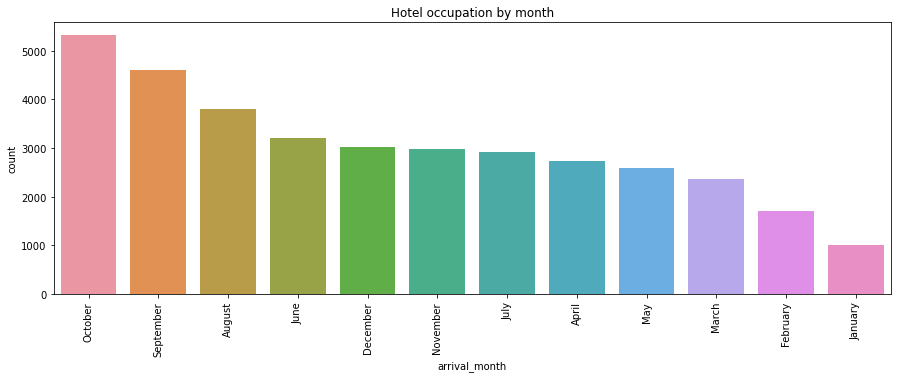

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=dfmonths, x='arrival_month', order= dfmonths['arrival_month'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Hotel occupation by month');

* October is the busiest month for the hotel with 5,317 arrivals followed by September, August and June.

* January is the month with the least number of arrivals. 

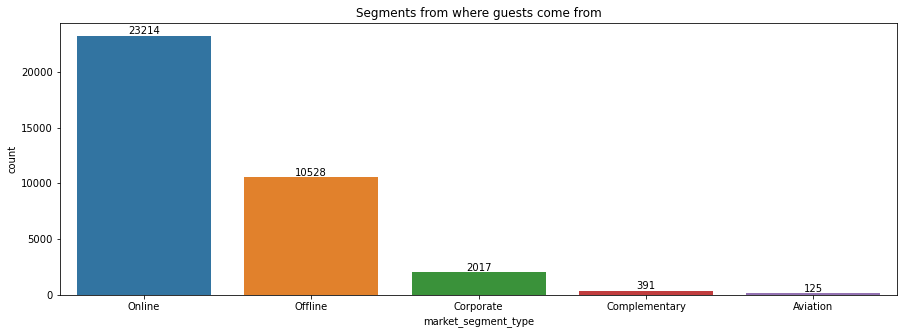

In [ ]:
# 2 Which market segment do most of the guests come from?
plt.figure(figsize= (15,5))
ax= sns.countplot(data= df, x='market_segment_type', order= df['market_segment_type'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Segments from where guests come from');

In [ ]:
df['market_segment_type'].value_counts(normalize=True)

Online           0.639945
Offline          0.290227
Corporate        0.055603
Complementary    0.010779
Aviation         0.003446
Name: market_segment_type, dtype: float64

* The majority of the people come from the online segment (64%), and the minority come from the aviation segment (.003%).
* Online and Offline segments represent 93% of the bookings.

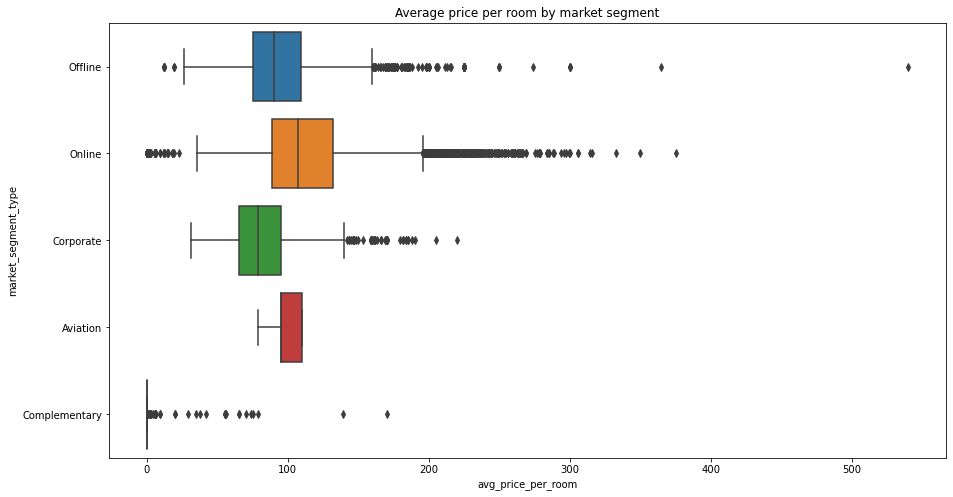

In [ ]:
# 3 Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
plt.figure(figsize= (15,8))
sns.boxplot(data=df, y='market_segment_type',x='avg_price_per_room')
plt.title('Average price per room by market segment');

* The highest median price per room is for the "Online" segment followed by "offline", "Corporate", "Aviation" and "Complementary". 
* Online segment is where the majority of the customers come from.
* The highest price is "offline" with 550 euros - it will be treated as an outlier
* There are some "Online" and many "Complementary" bookings that cost 0 euros.
* The highest median price is from the "aviation" segment followed by "online", however, for "Aviation" the median price is also the maximum price and it does not have outliers.

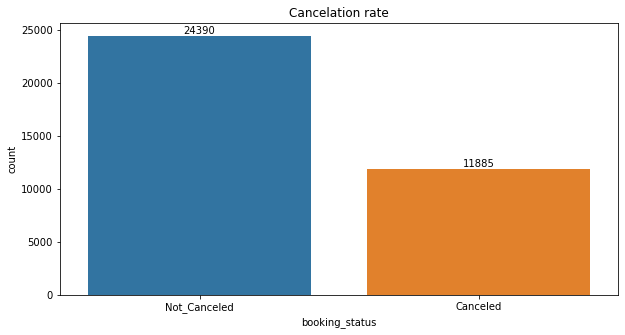

In [ ]:
# 4 What percentage of bookings are canceled?
plt.figure(figsize=(10,5))
ax= sns.countplot(data=df, x='booking_status')
ax.bar_label(ax.containers[0])
plt.title('Cancelation rate');

In [ ]:
df['booking_status'].value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

* Non_canceled bookings are more frequent than canceled bookings.
* 67% of bookings were not canceled and 33% were canceled. 

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930


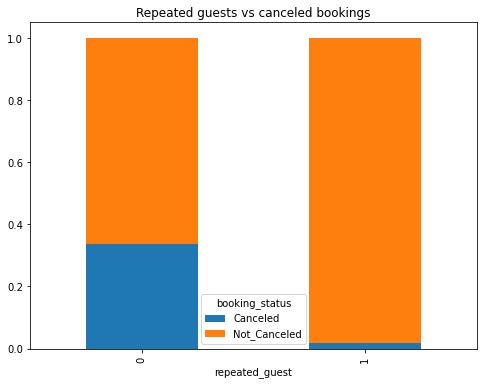

In [ ]:
# 5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

sorter = df['booking_status'].value_counts().index[-1]
tab1 = pd.crosstab(df['repeated_guest'], df['booking_status'], margins=True).sort_values(by=sorter,ascending=False)
print(tab1)

tab = pd.crosstab(df['repeated_guest'], df['booking_status'], normalize="index").sort_values(by=sorter, ascending=False)
ax = tab.plot(kind="bar", stacked=True, figsize=(8, 6))
ax.set_title('Repeated guests vs canceled bookings'); 

* Repeated guests cancel significantly less than one time guests.

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8


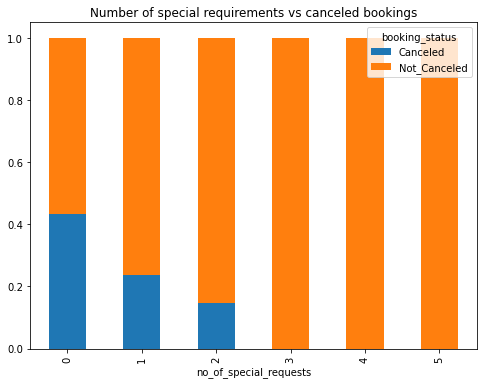

In [ ]:
# 6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?
sorter = df['booking_status'].value_counts().index[-1]
tab = pd.crosstab(df['no_of_special_requests'], df['booking_status'], margins=True).sort_values(by=sorter,ascending=False)
print(tab)

tab1 = pd.crosstab(df['no_of_special_requests'], df['booking_status'], normalize="index").sort_values(by=sorter, ascending=False)
ax = tab1.plot(kind="bar", stacked=True, figsize=(8, 6))
ax.set_title('Number of special requirements vs canceled bookings'); 

* People that book more than 3 special requirements do not cancel their bookings.
* Bookings with no special requirements are the ones that get canceled the most followed by the ones that only book 1 and 2 special requirements. 

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

#### Missing values and duplicated values detection

In [ ]:
# Looking for duplicated values
df.duplicated().sum()

0

In [ ]:
df['Booking_ID'].astype(str)

0        INN00001
1        INN00002
2        INN00003
3        INN00004
4        INN00005
           ...   
36270    INN36271
36271    INN36272
36272    INN36273
36273    INN36274
36274    INN36275
Name: Booking_ID, Length: 36275, dtype: object

In [ ]:
df.duplicated(subset = ['Booking_ID']).sum()

0

In [ ]:
# Looking for missing values
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

* There are no missing values

#### Outlier detection

In [ ]:
df._get_numeric_data().columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

<Figure size 720x360 with 0 Axes>

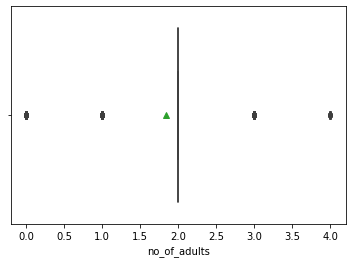

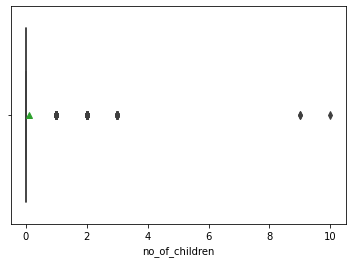

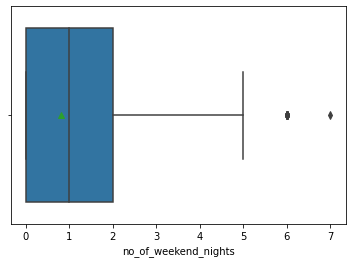

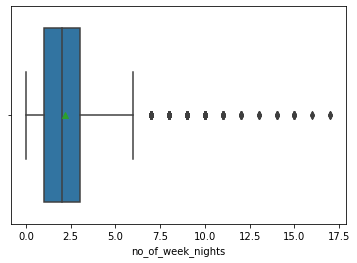

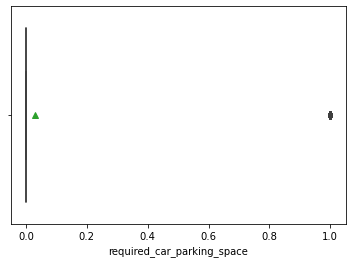

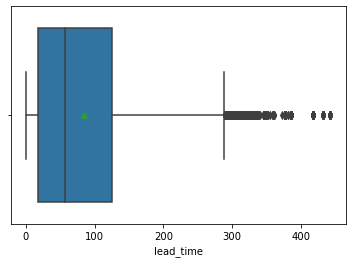

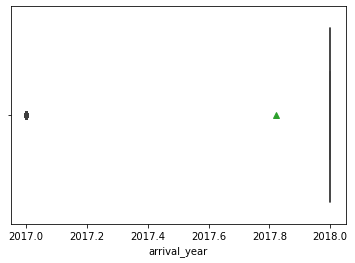

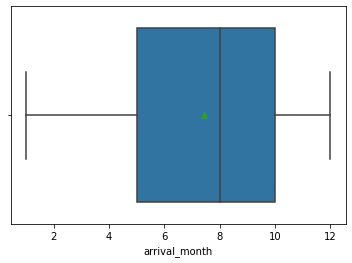

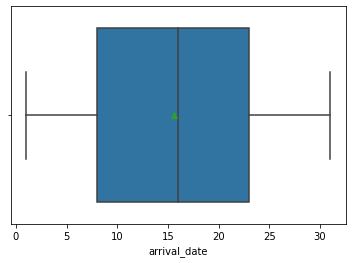

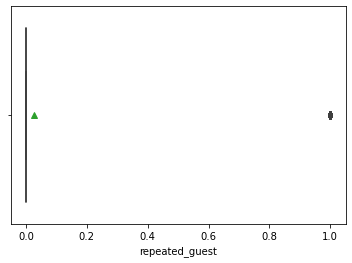

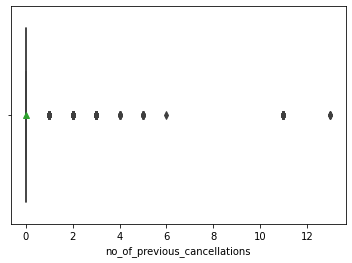

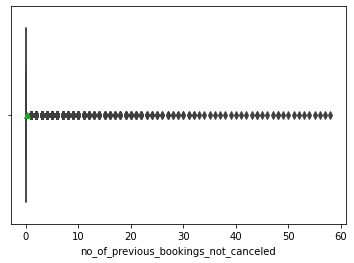

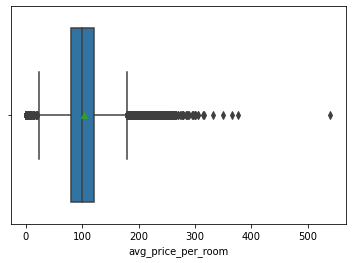

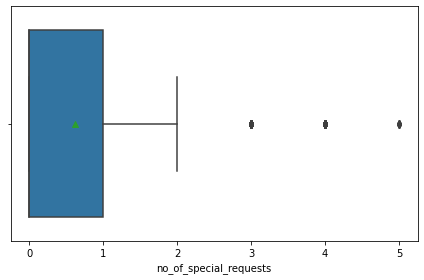

In [ ]:
# plotting numerical variables 
num_col_out = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

plt.figure(figsize=(10,5))
for i, col in enumerate(num_col_out):
    ax =  plt.subplots(1)
    sns.boxplot(data=df, x=col, showmeans= True)
plt.tight_layout()

* `no_of_adults` has a value of 0 adults which needs to be corrected since having no adults in a reservation is an uncommon case. This value will be checked to see how many observations fall into this case.
* `no_of_children` has values of 9 and 10 children which is also an unusual case. This values will be checked to see how many observations fall in this case.
* `no_of_weekend_nights` values will be taken as real values.
* `no_of_week_nights` values will be taken as real values.
* `required_car_parking_space` is a binari yes/no (1/0).
* `lead_time` there are outliers with values above 365 days. These values will be checked to see how many observations fall into this case and decide how will they be treated.
* `arrival_year` values will be taken as real values. This sample was for arrival years 2017-2018.
* `arrival_month` values looks good.
* `arrival_date` values looks good.
* `repeated_guest` is a binari yes/no (1/0).
* `no_of_previous_cancellations` values will be taken as real values.
* `no_of_previous_bookings_not_canceled` values will be taken as real values.
* `avg_price_per_room` rooms price 0 euros and above 500 need to be checked.
* `no_of_special_requests` values will be taken as real values.

In [ ]:
df[(df['no_of_adults']==0)] 
# Bookings with children and no adults make no sense this values have to be treated

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
32      INN00033             0               2                     0   
287     INN00288             0               2                     2   
653     INN00654             0               2                     1   
937     INN00938             0               2                     0   
954     INN00955             0               2                     1   
...          ...           ...             ...                   ...   
34720   INN34721             0               2                     0   
34730   INN34731             0               2                     1   
34890   INN34891             0               2                     2   
35691   INN35692             0               2                     2   
35797   INN35798             0               2                     0   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
32                     3       Meal Plan 1                           0   
287                    2       Meal Plan 1                           0   
653                    2       Meal Plan 1                           0   
937                    3       Meal Plan 1                           0   
954                    1       Meal Plan 1                           0   
...                  ...               ...                         ...   
34720                  3       Meal Plan 1                           0   
34730                  1       Meal Plan 1                           0   
34890                  2       Meal Plan 1                           0   
35691                  1       Meal Plan 1                           0   
35797                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
32           Room_Type 2         56          2018             12   
287          Room_Type 1         68          2018              4   
653          Room_Type 2         78          2018              8   
937          Room_Type 2         40          2018              1   
954          Room_Type 2         92          2018             10   
...                  ...        ...           ...            ...   
34720        Room_Type 2         76          2018              9   
34730        Room_Type 2        178          2018              8   
34890        Room_Type 2         31          2018              9   
35691        Room_Type 2         75          2018              3   
35797        Room_Type 2        120          2018              6   

       arrival_date market_segment_type  repeated_guest  \
32                7              Online               0   
287              24              Online               0   
653              19              Online               0   
937              14              Online               0   
954              29              Online               0   
...             ...                 ...             ...   
34720            21              Online               0   
34730            27              Online               0   
34890            16              Online               0   
35691            19              Online               0   
35797            30              Online               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
32                                0                                     0   
287                               0                                     0   
653                               0                                     0   
937                               0                                     0   
954                               0                                     0   
...                             ...                                   ...   
34720                             0                                     0   
34730                             0                                     0   
34890                            

In [ ]:
df[df['no_of_children']>=5] # Having 9-10 kids per booking make no sense

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
6338    INN06339             2              10                     0   
10041   INN10042             1               9                     2   
10061   INN10062             2               9                     2   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
6338                   2       Meal Plan 1                           0   
10041                  1       Meal Plan 1                           0   
10061                  5       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
6338         Room_Type 4         37          2018              1   
10041        Room_Type 1         11          2017             10   
10061        Room_Type 2          8          2017              8   

       arrival_date market_segment_type  repeated_guest  \
6338             12              Online               0   
10041            11           Corporate               0   
10061            13              Online               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
6338                              0                                     0   
10041                             0                                     0   
10061                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
6338                84.45                       1   Not_Canceled  
10041               95.00                       0   Not_Canceled  
10061               76.50                       1       Canceled

In [ ]:
print("Max lead time days:",df['lead_time'].max()) 
print("Min lead time days:", df['lead_time'].min())

Max lead time days: 443
Min lead time days: 0


In [ ]:
df[df['lead_time']==443] #Planning a trip with 1.2 years in advance is plausible

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
118     INN00119             2               0                     0   
1943    INN01944             2               0                     0   
2279    INN02280             2               0                     0   
3146    INN03147             2               0                     0   
3373    INN03374             2               0                     0   
3746    INN03747             2               0                     0   
5211    INN05212             2               0                     0   
11147   INN11148             2               0                     0   
12625   INN12626             2               0                     0   
19141   INN19142             1               0                     0   
19172   INN19173             2               0                     0   
21271   INN21272             2               0                     0   
24299   INN24300             2               0                     0   
24865   INN24866             1               0                     0   
26983   INN26984             2               0                     0   
27005   INN27006             2               0                     0   
28115   INN28116             2               0                     0   
29450   INN29451             2               0                     0   
29455   INN29456             2               0                     0   
31993   INN31994             2               0                     0   
33817   INN33818             2               0                     0   
35656   INN35657             2               0                     0   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
118                    1       Meal Plan 1                           0   
1943                   1       Meal Plan 1                           0   
2279                   1       Meal Plan 1                           0   
3146                   1       Meal Plan 1                           0   
3373                   1       Meal Plan 1                           0   
3746                   1       Meal Plan 1                           0   
5211                   1       Meal Plan 1                           0   
11147                  1       Meal Plan 1                           0   
12625                  1       Meal Plan 1                           0   
19141                  1       Meal Plan 1                           0   
19172                  1       Meal Plan 1                           0   
21271                  1       Meal Plan 1                           0   
24299                  1       Meal Plan 1                           0   
24865                  1       Meal Plan 1                           0   
26983                  1       Meal Plan 1                           0   
27005                  1       Meal Plan 1                           0   
28115                  1       Meal Plan 1                           0   
29450                  1       Meal Plan 1                           0   
29455                  1       Meal Plan 1                           0   
31993                  1       Meal Plan 1                           0   
33817                  1       Meal Plan 1                           0   
35656                  1       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
118          Room_Type 1        443          2018              4   
1943         Room_Type 1        443          2018              4   
2279         Room_Type 1        443          2018              4   
3146         Room_Type 1        443          2018              4   
3373         Room_Type 1        443          2018              4   
3746         Room_Type 1        443          2018              4   
5211         Room_Type 1        443          2018              4   
11147        Room_Type 1        443          2018              4   
12625        Room_Type 1        44

In [ ]:
print("Max average price:",df['avg_price_per_room'].max()) 
print("Min average price:", df['avg_price_per_room'].min())

Max average price: 540.0
Min average price: 0.0


In [ ]:
df[df['avg_price_per_room']==540] 
# This outlier will be treated with the average price per room for arrivals in March

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
33114   INN33115             2               0                     0   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
33114                  1       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
33114        Room_Type 1         35          2018              3   

       arrival_date market_segment_type  repeated_guest  \
33114            25             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
33114                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
33114               540.0                       0       Canceled

In [ ]:
df[df['avg_price_per_room']>299]
# This price values will be treated as real, since the arrival bookings correspond to the most popular months

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
4150    INN04151             2               2                     1   
5163    INN05164             2               2                     1   
9461    INN09462             3               0                     0   
13911   INN13912             2               0                     2   
13944   INN13945             2               2                     0   
14046   INN14047             4               0                     2   
14773   INN14774             2               2                     0   
20900   INN20901             2               1                     1   
25670   INN25671             2               2                     1   
29779   INN29780             2               0                     1   
30475   INN30476             2               0                     2   
33114   INN33115             2               0                     0   
33955   INN33956             2               0                     1   
34306   INN34307             2               2                     0   
35970   INN35971             2               0                     2   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
4150                   2       Meal Plan 1                           0   
5163                   1       Meal Plan 1                           0   
9461                   2       Meal Plan 1                           0   
13911                  3       Meal Plan 2                           0   
13944                  1       Meal Plan 2                           1   
14046                  1       Meal Plan 1                           0   
14773                  3       Meal Plan 1                           0   
20900                  2       Meal Plan 2                           0   
25670                  2       Meal Plan 2                           0   
29779                  2       Meal Plan 2                           0   
30475                  3       Meal Plan 2                           0   
33114                  1       Meal Plan 1                           0   
33955                  2       Meal Plan 2                           0   
34306                  3       Meal Plan 2                           0   
35970                  3       Meal Plan 2                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
4150         Room_Type 7          4          2018              7   
5163         Room_Type 7         18          2018             10   
9461         Room_Type 4         21          2018             12   
13911        Room_Type 1        170          2018              7   
13944        Room_Type 6          6          2018              8   
14046        Room_Type 7         21          2018              7   
14773        Room_Type 6         28          2018              6   
20900        Room_Type 1        173          2018              7   
25670        Room_Type 6         11          2018              9   
29779        Room_Type 1        173          2018              7   
30475        Room_Type 1        151          2018              7   
33114        Room_Type 1         35          2018              3   
33955        Room_Type 4         57          2018             12   
34306        Room_Type 6         43          2018             12   
35970        Room_Type 1        172          2018              7   

       arrival_date market_segment_type  repeated_guest  \
4150              8              Online               0   
5163             22              Online               0   
9461             30              Online               0   
13911            29             Offline               0   
13944            13              Online               0   
14046            17              Online               0   
14773             2              Online               0   
20900            25             Offline               0   
25670            16              Online         

In [ ]:
df[(df['avg_price_per_room']==0) & (df['market_segment_type']!='Complementary')]
# Bookings that are not complementary and cost 0 euros make no sense

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
1046    INN01047             1               0                     0   
1158    INN01159             2               0                     0   
1176    INN01177             1               0                     0   
1401    INN01402             1               0                     0   
1403    INN01404             3               0                     0   
...          ...           ...             ...                   ...   
35949   INN35950             2               0                     0   
35961   INN35962             1               0                     0   
36114   INN36115             1               0                     0   
36217   INN36218             2               0                     2   
36250   INN36251             1               0                     0   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
1046                   2       Meal Plan 2                           0   
1158                   0       Meal Plan 1                           0   
1176                   2       Meal Plan 2                           0   
1401                   2       Meal Plan 2                           0   
1403                   0       Meal Plan 1                           0   
...                  ...               ...                         ...   
35949                  0       Meal Plan 1                           0   
35961                  1       Meal Plan 1                           0   
36114                  1       Meal Plan 1                           0   
36217                  1       Meal Plan 1                           0   
36250                  2       Meal Plan 2                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
1046         Room_Type 1          6          2017             12   
1158         Room_Type 1        145          2018              7   
1176         Room_Type 1          6          2017             12   
1401         Room_Type 1          6          2017             12   
1403         Room_Type 4         57          2018              4   
...                  ...        ...           ...            ...   
35949        Room_Type 1         30          2017             10   
35961        Room_Type 1          5          2017             10   
36114        Room_Type 1          1          2018              3   
36217        Room_Type 2          3          2017              8   
36250        Room_Type 1          6          2017             12   

       arrival_date market_segment_type  repeated_guest  \
1046             10              Online               0   
1158              5              Online               0   
1176             10              Online               0   
1401             10              Online               0   
1403              1              Online               0   
...             ...                 ...             ...   
35949             8              Online               0   
35961            21              Online               0   
36114             2              Online               0   
36217             9              Online               0   
36250            10              Online               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
1046                              0                                     0   
1158                              0                                     0   
1176                              0                                     0   
1401                              0                                     0   
1403                              0                                     0   
...                             ...                                   ...   
35949                             0                                     0   
35961                             0                                     0   
36114                            

* This outliers will be treated with the value of the lowest whisker.

In [ ]:
# Getting lower and upper whiskers
upper_quartile = np.percentile(df['avg_price_per_room'], 75)
lower_quartile = np.percentile(df['avg_price_per_room'], 25)

iqr = upper_quartile - lower_quartile
upper_whisker = df[df['avg_price_per_room']<=upper_quartile+1.5*iqr].max()
lower_whisker = df[df['avg_price_per_room']>=lower_quartile-1.5*iqr].min()
print(lower_whisker)

Booking_ID                                 INN00001
no_of_adults                                      0
no_of_children                                    0
no_of_weekend_nights                              0
no_of_week_nights                                 0
type_of_meal_plan                       Meal Plan 1
required_car_parking_space                        0
room_type_reserved                      Room_Type 1
lead_time                                         0
arrival_year                                   2017
arrival_month                                     1
arrival_date                                      1
market_segment_type                        Aviation
repeated_guest                                    0
no_of_previous_cancellations                      0
no_of_previous_bookings_not_canceled              0
avg_price_per_room                             23.0
no_of_special_requests                            0
booking_status                             Canceled
dtype: objec

In [ ]:
df[(df['avg_price_per_room']<23) & (df['market_segment_type']!='Complementary')]

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
165     INN00166             1               0                     2   
937     INN00938             0               2                     0   
1046    INN01047             1               0                     0   
1158    INN01159             2               0                     0   
1176    INN01177             1               0                     0   
...          ...           ...             ...                   ...   
36114   INN36115             1               0                     0   
36164   INN36165             2               0                     2   
36217   INN36218             2               0                     2   
36250   INN36251             1               0                     0   
36263   INN36264             1               0                     2   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
165                    1       Meal Plan 2                           0   
937                    3       Meal Plan 1                           0   
1046                   2       Meal Plan 2                           0   
1158                   0       Meal Plan 1                           0   
1176                   2       Meal Plan 2                           0   
...                  ...               ...                         ...   
36114                  1       Meal Plan 1                           0   
36164                  2       Meal Plan 1                           0   
36217                  1       Meal Plan 1                           0   
36250                  2       Meal Plan 2                           0   
36263                  1       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
165          Room_Type 1         23          2018              1   
937          Room_Type 2         40          2018              1   
1046         Room_Type 1          6          2017             12   
1158         Room_Type 1        145          2018              7   
1176         Room_Type 1          6          2017             12   
...                  ...        ...           ...            ...   
36114        Room_Type 1          1          2018              3   
36164        Room_Type 1          1          2017              8   
36217        Room_Type 2          3          2017              8   
36250        Room_Type 1          6          2017             12   
36263        Room_Type 1        116          2018              2   

       arrival_date market_segment_type  repeated_guest  \
165               2              Online               0   
937              14              Online               0   
1046             10              Online               0   
1158              5              Online               0   
1176             10              Online               0   
...             ...                 ...             ...   
36114             2              Online               0   
36164            22              Online               0   
36217             9              Online               0   
36250            10              Online               0   
36263            28              Online               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
165                               0                                     0   
937                               0                                     0   
1046                              0                                     0   
1158                              0                                     0   
1176                              0                                     0   
...                             ...                                   ...   
36114                             0                                     0   
36164                             0                                     0   
36217                            

In [ ]:
df_notcomp = df[(df['avg_price_per_room']<23) & (df['market_segment_type']!='Complementary')]
df_notcomp['avg_price_per_room'].unique()
# These outliers will be treated with the lowest whisker value for avg_price_per_room

array([ 1.  ,  6.67,  0.  ,  6.  ,  0.5 , 12.  , 15.  , 18.6 , 19.15,
        2.  , 14.  ,  3.  , 18.  ,  1.48,  9.  ])

In [ ]:
df['no_of_previous_cancellations'].unique()

array([ 0,  3,  1,  2, 11,  4,  5, 13,  6])

In [ ]:
df[df['no_of_previous_cancellations'] > 10].count()
# This values will be treated with the median value of the variable

Booking_ID                              29
no_of_adults                            29
no_of_children                          29
no_of_weekend_nights                    29
no_of_week_nights                       29
type_of_meal_plan                       29
required_car_parking_space              29
room_type_reserved                      29
lead_time                               29
arrival_year                            29
arrival_month                           29
arrival_date                            29
market_segment_type                     29
repeated_guest                          29
no_of_previous_cancellations            29
no_of_previous_bookings_not_canceled    29
avg_price_per_room                      29
no_of_special_requests                  29
booking_status                          29
dtype: int64

#### Outlier treatment

In [ ]:
# Droping observations that have kids but no adults. This is only 0.3% of the observations.
rows_eliminate = df[(df['no_of_adults']==0)].index
df.drop(rows_eliminate , inplace=True)


In [ ]:
df[(df['no_of_adults']==0)]

Empty DataFrame
Columns: [Booking_ID, no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests, booking_status]
Index: []

In [ ]:
print("Kids_count mean:",df['no_of_children'].mean())
print("Kids_count mode:",df['no_of_children'].mode())
print("Kids_count median:",df['no_of_children'].median())

Kids_count mean: 0.09788023024131061
Kids_count mode: 0    0
dtype: int64
Kids_count median: 0.0


In [ ]:
df['no_of_children']= df['no_of_children'].replace(9,3) # Giving the outliers the value of the next maximum value 
df['no_of_children']= df['no_of_children'].replace(10,3)

In [ ]:
df[df['no_of_children']>=5]

Empty DataFrame
Columns: [Booking_ID, no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests, booking_status]
Index: []

In [ ]:
# Treating outlier price 540 with the median price of month 3 (March).
df.groupby(['arrival_month'])[['avg_price_per_room']].median()

avg_price_per_room
arrival_month                    
1                           77.00
2                           79.00
3                           85.50
4                           96.30
5                          110.00
6                          115.00
7                          106.13
8                          108.45
9                          112.20
10                         102.60
11                          88.40
12                          82.11

In [ ]:
df['avg_price_per_room']= df['avg_price_per_room'].replace(540,85.50)

In [ ]:
df[df['avg_price_per_room']==540]

Empty DataFrame
Columns: [Booking_ID, no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests, booking_status]
Index: []

In [ ]:
# Replacing avg_price_per_room of non complementary segments with the lowest whisker value
df['avg_price_per_room'].mask((df['market_segment_type'] != 'Complementary')& (df['avg_price_per_room']<23), 23,inplace=True)

In [ ]:
df.groupby(['market_segment_type'])[['avg_price_per_room']].min() 
# Double check that values are treated

avg_price_per_room
market_segment_type                    
Aviation                           79.0
Complementary                       0.0
Corporate                          31.0
Offline                            23.0
Online                             23.0

In [ ]:
df['no_of_previous_cancellations'].median()

0.0

In [ ]:
df['no_of_previous_cancellations']= df['no_of_previous_cancellations'].replace(13,0)
df['no_of_previous_cancellations']= df['no_of_previous_cancellations'].replace(11,0)

### Feature engineering

In [ ]:
df.drop('Booking_ID',axis=1,inplace=True) # Dropping booking ID since it is an irrelevant variable for the model.

In [ ]:
# Converting the explained variable to 0/1 value 
df['booking_status'] = df['booking_status'].apply(lambda x: 1 if x == "Canceled" else 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36136 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36136 non-null  int64  
 1   no_of_children                        36136 non-null  int64  
 2   no_of_weekend_nights                  36136 non-null  int64  
 3   no_of_week_nights                     36136 non-null  int64  
 4   type_of_meal_plan                     36136 non-null  object 
 5   required_car_parking_space            36136 non-null  int64  
 6   room_type_reserved                    36136 non-null  object 
 7   lead_time                             36136 non-null  int64  
 8   arrival_year                          36136 non-null  int64  
 9   arrival_month                         36136 non-null  int64  
 10  arrival_date                          36136 non-null  int64  
 11  market_segment_

## EDA

- It is a good idea to explore the data once again after manipulating it.

###  Univariate analysis

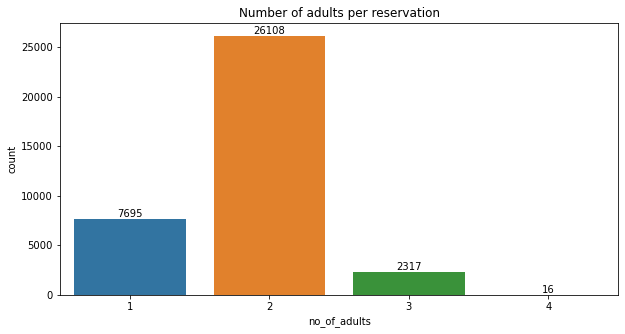

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.countplot(data=df, x= 'no_of_adults')
ax.bar_label(ax.containers[0])
plt.title('Number of adults per reservation');

Two adults are the most common number of adults per booking followed by lonely riders. 

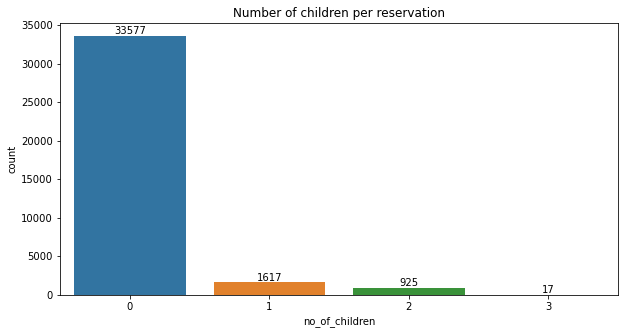

In [ ]:
plt.figure(figsize= (10,5))
ax= sns.countplot(data=df, x= 'no_of_children')
ax.bar_label(ax.containers[0])
plt.title('Number of children per reservation');

* Bookings usually have 0 kids per reservation.
* When a reservation has kids the number of kids is around 1-2. 
* There are just 17 bookings with 3 kids.  

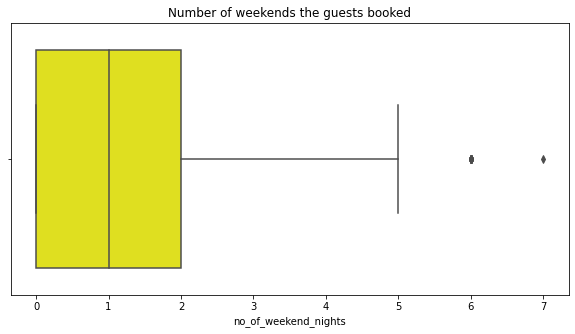

In [ ]:
plt.figure(figsize= (10,5))
sns.boxplot(data=df, x= 'no_of_weekend_nights', color='yellow')
plt.title('Number of weekends the guests booked');

* The median stay is 1 weekend and the maximum is 7 weekends.

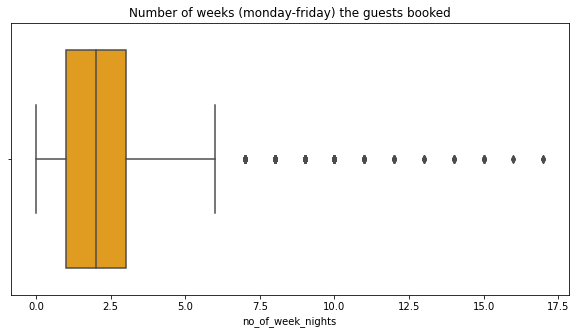

In [ ]:
plt.figure(figsize= (10,5))
sns.boxplot(data=df, x= 'no_of_week_nights', color='orange')
plt.title('Number of weeks (monday-friday) the guests booked');

* The median weeks to stay is 2 and the maximum is 17. 

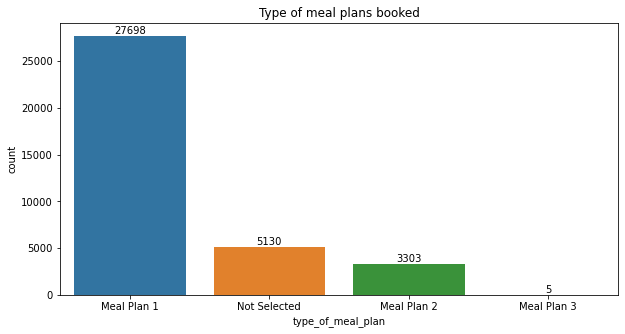

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.countplot(data=df, x= 'type_of_meal_plan')
ax.bar_label(ax.containers[0])
plt.title('Type of meal plans booked');

* The most frequent meal plan chosen is "Meal_Plan_1" followed by "Not_Selected" and "Meal_Plan_2". 
* "Meal_plan_3" is the least selected with only 5 bookings.

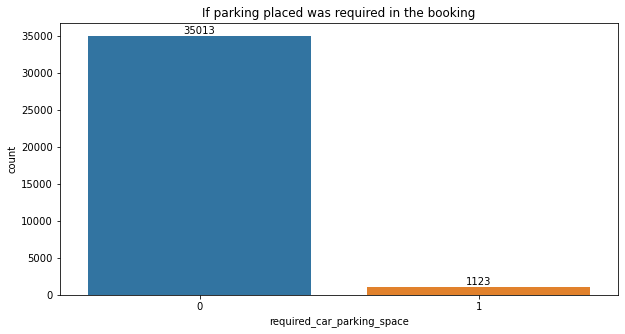

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.countplot(data=df, x= 'required_car_parking_space')
ax.bar_label(ax.containers[0])
plt.title('If parking placed was required in the booking');

In [ ]:
df['required_car_parking_space'].value_counts(normalize = True)

0    0.968923
1    0.031077
Name: required_car_parking_space, dtype: float64

* 97% of the bookings do not require parking space.

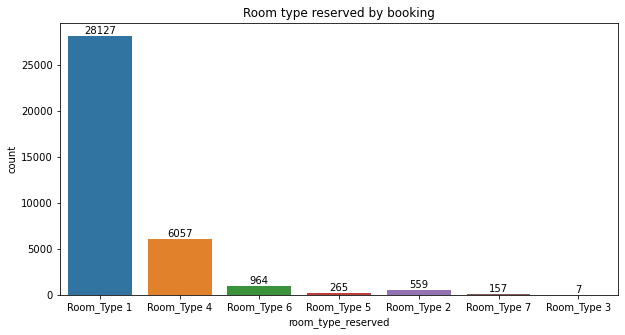

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.countplot(data=df, x= 'room_type_reserved')
ax.bar_label(ax.containers[0])
plt.title('Room type reserved by booking');

In [ ]:
df['room_type_reserved'].value_counts(normalize = True)

Room_Type 1    0.778365
Room_Type 4    0.167617
Room_Type 6    0.026677
Room_Type 2    0.015469
Room_Type 5    0.007333
Room_Type 7    0.004345
Room_Type 3    0.000194
Name: room_type_reserved, dtype: float64

* "Room_Type_1" is the most frequently chosen followed by "Room_Type_4" and "Room_Type_6". 
* The least chosen is "Room_Type_3" with only 7 bookings. 
* "Room_type_1" represents 78% of the bookings.

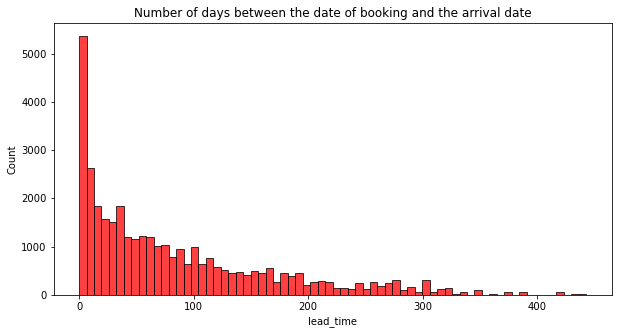

In [ ]:
plt.figure(figsize= (10,5))
sns.histplot(data=df, x= 'lead_time', color = 'red')
plt.title('Number of days between the date of booking and the arrival date');

* Lead_time is right skewed and most bookings lead times are between 0-300 days.

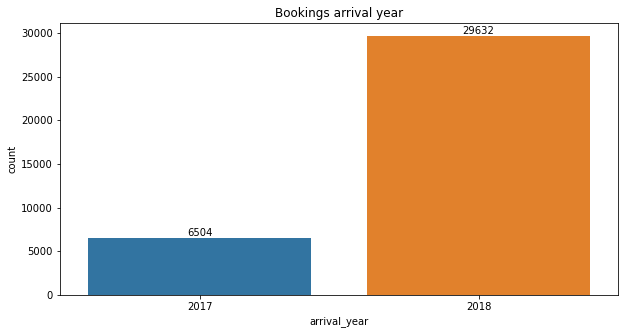

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.countplot(data=df, x= 'arrival_year')
ax.bar_label(ax.containers[0])
plt.title('Bookings arrival year');

* Most observations correspond to arrival dates in year 2018.

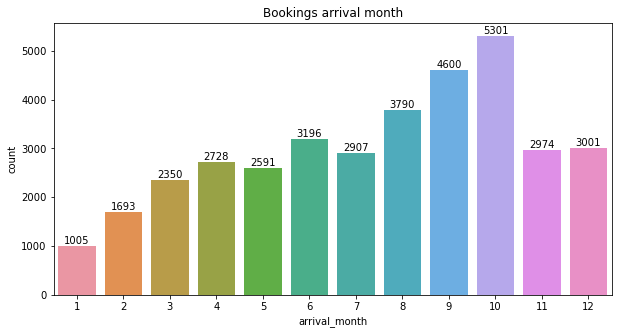

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.countplot(data=df, x= 'arrival_month')
ax.bar_label(ax.containers[0])
plt.title('Bookings arrival month');

* Most booking arrivals were in October, followed by September, August, and June.
* January, February, and March are the months with the least number of arrivals. 

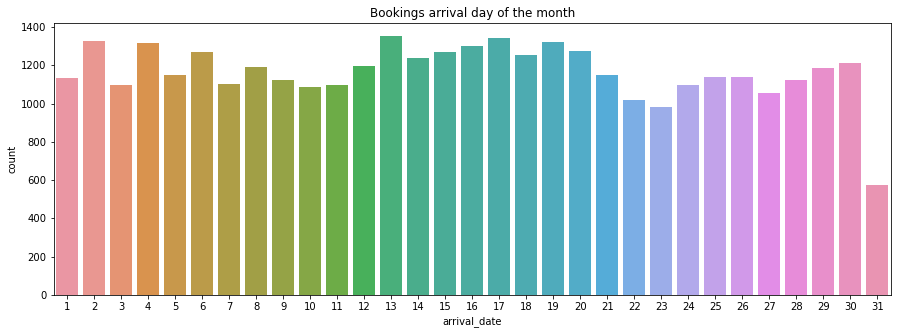

In [ ]:
plt.figure(figsize= (15,5))
sns.countplot(data=df, x= 'arrival_date')
plt.title('Bookings arrival day of the month');

* This is a uniform distribution.
* It would seem that the 31st is the least preferred day to arrive, but let us not forget that not all months have 31 days. Bookings on this day are significantly lower because of that.

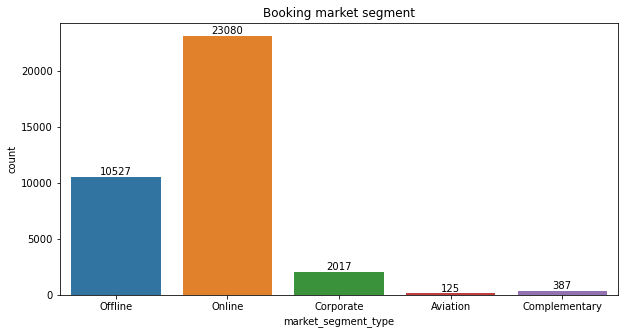

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.countplot(data=df, x= 'market_segment_type')
ax.bar_label(ax.containers[0])
plt.title('Booking market segment');

* "Online" segment is where most of the booking come from, followed by "Offline" and "Corporate". 
* "Aviation" segment is where the least of the booking come from followed by the  "Complementary" segment. 

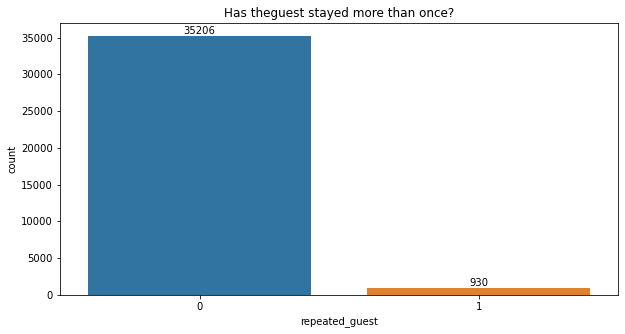

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.countplot(data=df, x= 'repeated_guest')
ax.bar_label(ax.containers[0])
plt.title('Has theguest stayed more than once?');

In [ ]:
df['repeated_guest'].value_counts(normalize = True)

0    0.974264
1    0.025736
Name: repeated_guest, dtype: float64

* Most of the guests are not repeated guests.
* Only 2.6% of the bookings are repeated guests.

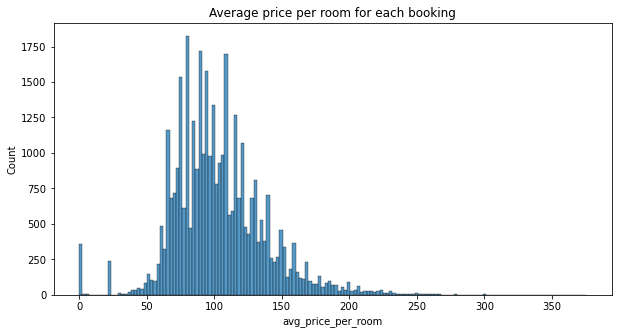

In [ ]:
plt.figure(figsize= (10,5))
sns.histplot(data=df, x= 'avg_price_per_room')
plt.title('Average price per room for each booking');

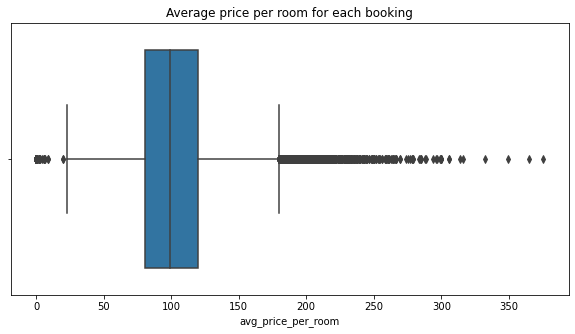

In [ ]:
plt.figure(figsize= (10,5))
sns.boxplot(data=df, x= 'avg_price_per_room')
plt.title('Average price per room for each booking');

* Average price per room is skewed to the right. 
* Prices range from 0-380 euros. 

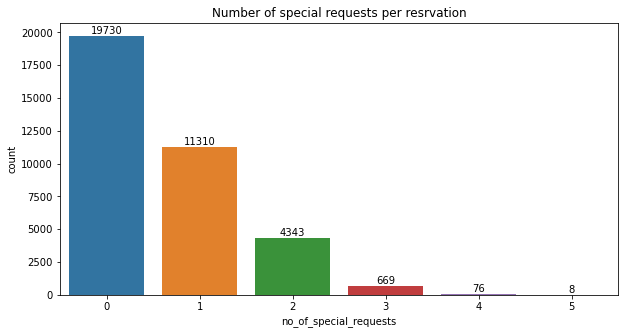

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.countplot(data=df, x= 'no_of_special_requests')
ax.bar_label(ax.containers[0])
plt.title('Number of special requests per resrvation');

* Most bookings do not ask for special requests, however, most other bookings do ask for 1-2 special requests. 
* To ask for more than 3 special requests is not that common, however, 84 bookings asked for more than 3 special requests.

In [ ]:
data['booking_status'].value_counts(1)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

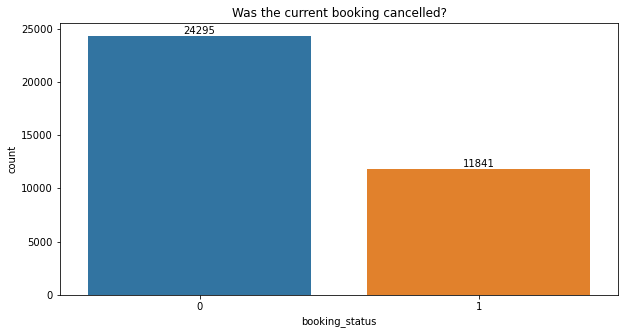

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.countplot(data=df, x= 'booking_status')
ax.bar_label(ax.containers[0])
plt.title('Was the current booking cancelled?');

* Most of the bookings were not canceled.
* Canceled bookings represent 32% of the sample.

### Multivariate Analysis

booking_status      0      1    All
no_of_children                     
All             24295  11841  36136
0               22695  10882  33577
1                1077    540   1617
2                 512    413    925
3                  11      6     17


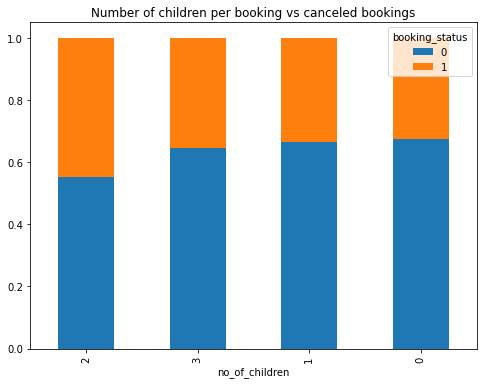

In [ ]:
sorter = df['booking_status'].value_counts().index[-1]
tab = pd.crosstab(df['no_of_children'], df['booking_status'], margins=True).sort_values(by=sorter,ascending=False)
print(tab)

tab1 = pd.crosstab(df['no_of_children'], df['booking_status'], normalize="index").sort_values(by=sorter, ascending=False)
ax = tab1.plot(kind="bar", stacked=True, figsize=(8, 6))
ax.set_title('Number of children per booking vs canceled bookings');

* Bookings with two kids are the ones that get canceled the most followed by the ones with 3 kids. 
* Bookings with no kids are canceled the least.

booking_status      0      1    All
arrival_month                      
All             24295  11841  36136
10               3423   1878   5301
9                3067   1533   4600
8                2311   1479   3790
7                1602   1305   2907
6                1906   1290   3196
4                1734    994   2728
5                1645    946   2591
11               2103    871   2974
3                1654    696   2350
2                1266    427   1693
12               2603    398   3001
1                 981     24   1005


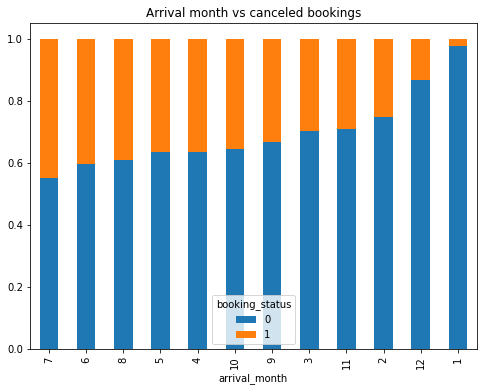

In [ ]:
sorter = df['booking_status'].value_counts().index[-1]
tab = pd.crosstab(df['arrival_month'], df['booking_status'], margins=True).sort_values(by=sorter,ascending=False)
print(tab)

tab1 = pd.crosstab(df['arrival_month'], df['booking_status'], normalize="index").sort_values(by=sorter, ascending=False)
ax = tab1.plot(kind="bar", stacked=True, figsize=(8, 6))
ax.set_title('Arrival month vs canceled bookings');

* Bookings with arrivals month in January are the ones that get canceled the least.
* Bookings get canceled the most in July, June, and August (school vacation season).

booking_status      0      1    All
arrival_date                       
All             24295  11841  36136
15                731    537   1268
16                829    473   1302
4                 850    469   1319
1                 667    465   1132
30                749    462   1211
12                740    458   1198
17                896    447   1343
6                 827    444   1271
26                718    422   1140
20                864    413   1277
19                910    410   1320
13                945    408   1353
28                722    403   1125
3                 694    403   1097
25                746    394   1140
21                776    374   1150
24                727    370   1097
18                890    365   1255
7                 743    361   1104
8                 838    355   1193
22                670    351   1021
23                645    338    983
29                851    334   1185
11                767    330   1097
5                 825    326

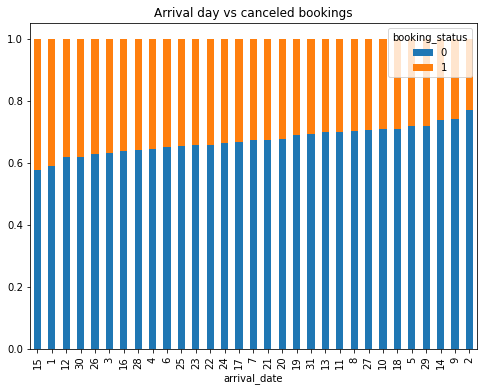

In [ ]:
sorter = df['booking_status'].value_counts().index[-1]
tab = pd.crosstab(df['arrival_date'], df['booking_status'], margins=True).sort_values(by=sorter,ascending=False)
print(tab)

tab1 = pd.crosstab(df['arrival_date'], df['booking_status'], normalize="index").sort_values(by=sorter, ascending=False)
ax = tab1.plot(kind="bar", stacked=True, figsize=(8, 6))
ax.set_title('Arrival day vs canceled bookings');

* There is not a specific pattern where one can decide if cancellations are higher starting the month, during the month, or at the end of the month.
* Bookings falling on the 15th get canceled the most while arrival bookings falling on the 2nd get canceled the least. 

booking_status         0      1    All
type_of_meal_plan                     
All                24295  11841  36136
Meal Plan 1        19063   8635  27698
Not Selected        3431   1699   5130
Meal Plan 2         1797   1506   3303
Meal Plan 3            4      1      5


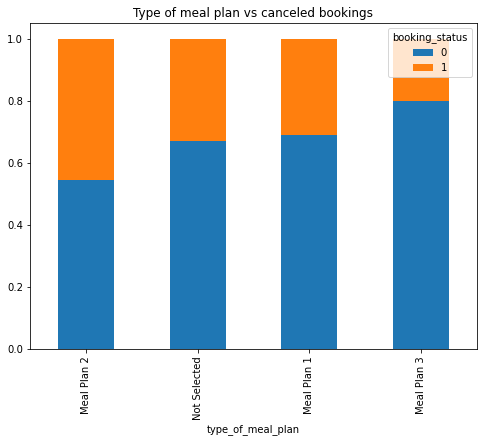

In [ ]:
sorter = df['booking_status'].value_counts().index[-1]
tab = pd.crosstab(df['type_of_meal_plan'], df['booking_status'], margins=True).sort_values(by=sorter,ascending=False)
print(tab)

tab1 = pd.crosstab(df['type_of_meal_plan'], df['booking_status'], normalize="index").sort_values(by=sorter, ascending=False)
ax = tab1.plot(kind="bar", stacked=True, figsize=(8, 6))
ax.set_title('Type of meal plan vs canceled bookings');

* Bookings with "Meal_plan_2" are the ones that are canceled the most while bookings with "Meal_plan_3" are the ones that get canceled the least.

booking_status           0      1    All
market_segment_type                     
All                  24295  11841  36136
Online               14649   8431  23080
Offline               7374   3153  10527
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          387      0    387


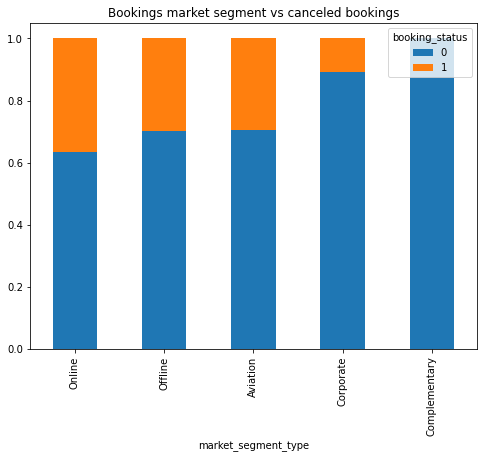

In [ ]:
sorter = df['booking_status'].value_counts().index[-1]
tab = pd.crosstab(df['market_segment_type'], df['booking_status'], margins=True).sort_values(by=sorter,ascending=False)
print(tab)

tab1 = pd.crosstab(df['market_segment_type'], df['booking_status'], normalize="index").sort_values(by=sorter, ascending=False)
ax = tab1.plot(kind="bar", stacked=True, figsize=(8, 6))
ax.set_title('Bookings market segment vs canceled bookings');

* "Complementary" bookings have a 0 cancelation rate, while "Corporate" follows with the second lowest cancelations.
* "Online" bookings are the ones that get canceled the most.
* "Aviation" and "Offline" have the same number of cancelations. 

booking_status                    0      1    All
no_of_previous_cancellations                     
All                           24295  11841  36136
0                             23998  11829  35827
1                               187     11    198
3                                42      1     43
2                                46      0     46
4                                10      0     10
5                                11      0     11
6                                 1      0      1


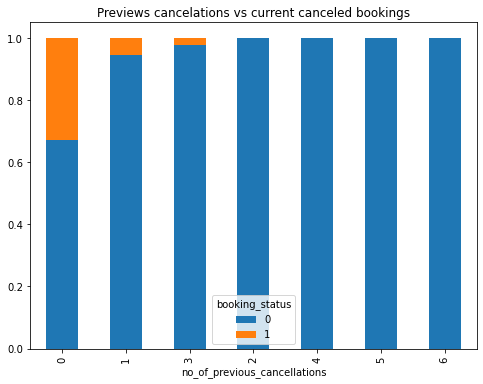

In [ ]:
sorter = df['booking_status'].value_counts().index[-1]
tab = pd.crosstab(df['no_of_previous_cancellations'], df['booking_status'], margins=True).sort_values(by=sorter,ascending=False)
print(tab)

tab1 = pd.crosstab(df['no_of_previous_cancellations'], df['booking_status'], normalize="index").sort_values(by=sorter, ascending=False)
ax = tab1.plot(kind="bar", stacked=True, figsize=(8, 6))
ax.set_title('Previews cancelations vs current canceled bookings');

* The greater the number of cancelations previous to the current booking less is the chance of it being canceled.
* Bookings with no previous cancelations get canceled the most. 

booking_status          0      1    All
room_type_reserved                     
All                 24295  11841  36136
Room_Type 1         19056   9071  28127
Room_Type 4          3988   2069   6057
Room_Type 6           558    406    964
Room_Type 2           374    185    559
Room_Type 5           193     72    265
Room_Type 7           121     36    157
Room_Type 3             5      2      7


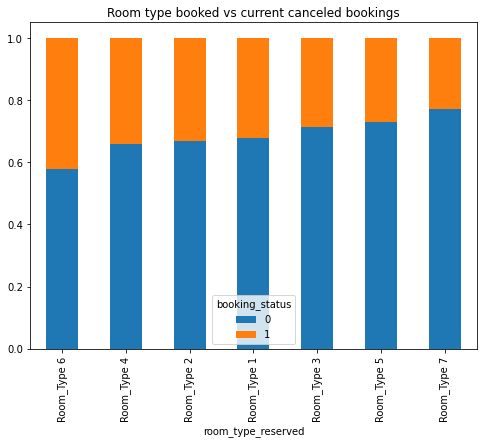

In [ ]:
sorter = df['booking_status'].value_counts().index[-1]
tab = pd.crosstab(df['room_type_reserved'], df['booking_status'], margins=True).sort_values(by=sorter,ascending=False)
print(tab)

tab1 = pd.crosstab(df['room_type_reserved'], df['booking_status'], normalize="index").sort_values(by=sorter, ascending=False)
ax = tab1.plot(kind="bar", stacked=True, figsize=(8, 6))
ax.set_title('Room type booked vs current canceled bookings');

* "Room_type_7" is the one canceled the least.
* "Room_type_6" is the one with most cancelations.

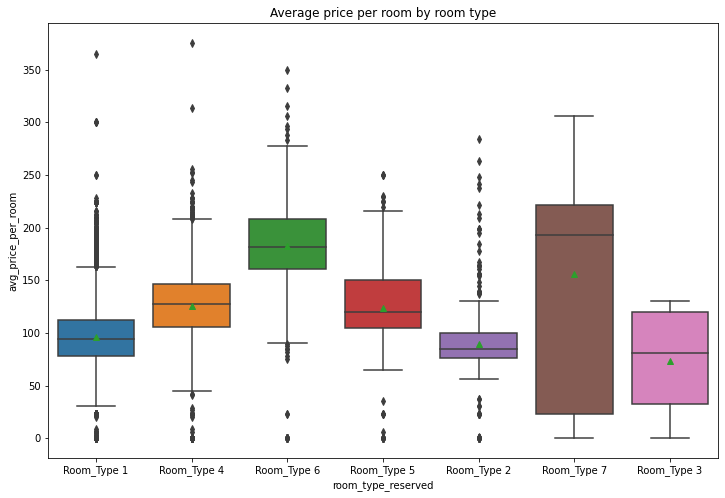

In [ ]:
plt.figure(figsize= (12,8))
sns.boxplot(data=df, x= 'room_type_reserved', y='avg_price_per_room', showmeans= True)
plt.title('Average price per room by room type');

* "Room_Type_7" is the one with the highest MEDIAN value and has no outliers.
* The second highest MEDIAN price value corresponds to "Room_type_6".
* "Room_Type_3" does not have outliers and has the cheapest MEDIAN value. 
* The most expensive avg_price_per_room corresponds to "Room_Type_4", followed by "Room_type_1" (outliers).


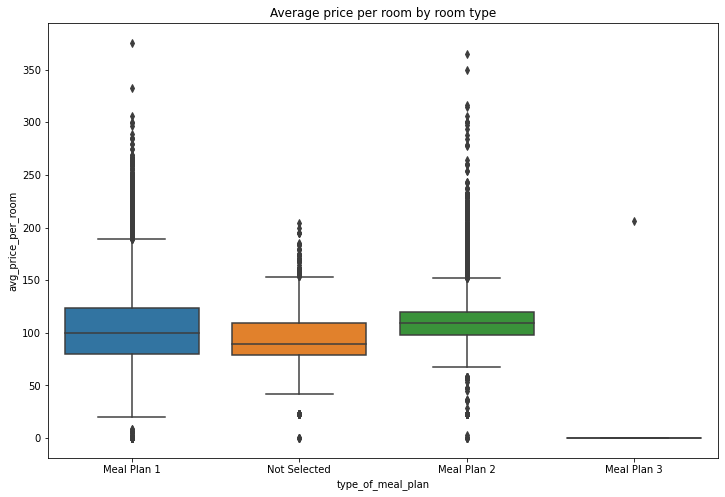

In [ ]:
plt.figure(figsize= (12,8))
sns.boxplot(data=df, x= 'type_of_meal_plan', y='avg_price_per_room')
plt.title('Average price per room by room type');

* People that choose "Meal_plan_3" have the lowest MEDIAN `av_price_per_room`.
* People that choose "Meal_plan_2" usually pay the highet MEDIAN `av_price_per_room`, followed by "Meal_plan_1".


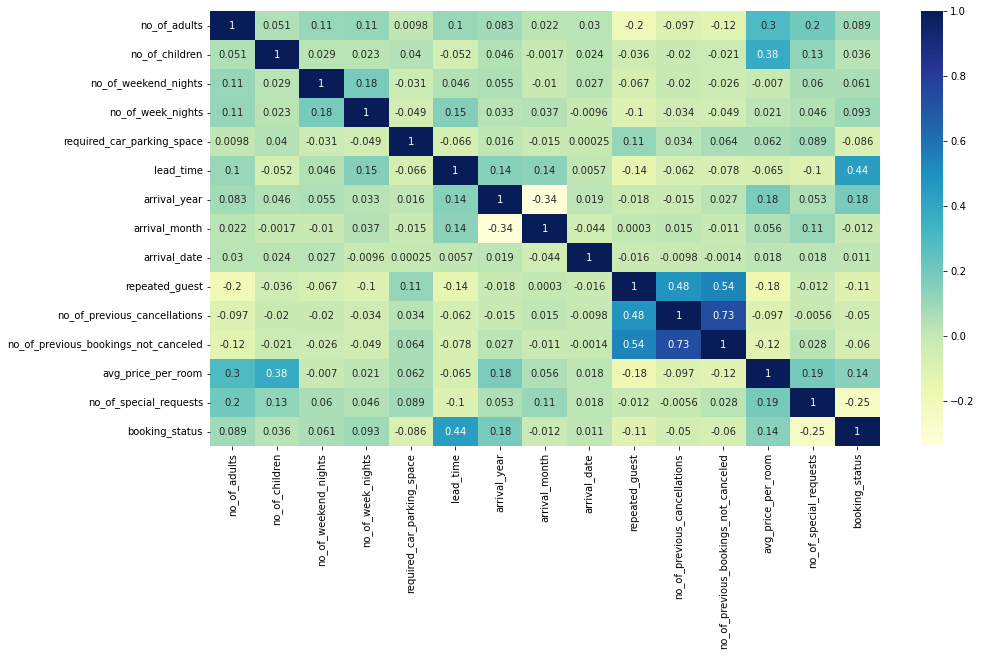

In [ ]:
plt.figure(figsize= (15,8))
sns.heatmap(data=df.corr(), annot=True, cbar=True, cmap='YlGnBu');  

* The highest correlation is between variable `no_of_previous_bookings_not_canceled` and `repeated_guest` with 0.54. 
* The second highest correlation is between variable `no_of_previous_bookings_not_canceled` and `no_of_previous_cancellations` with 0.47. 

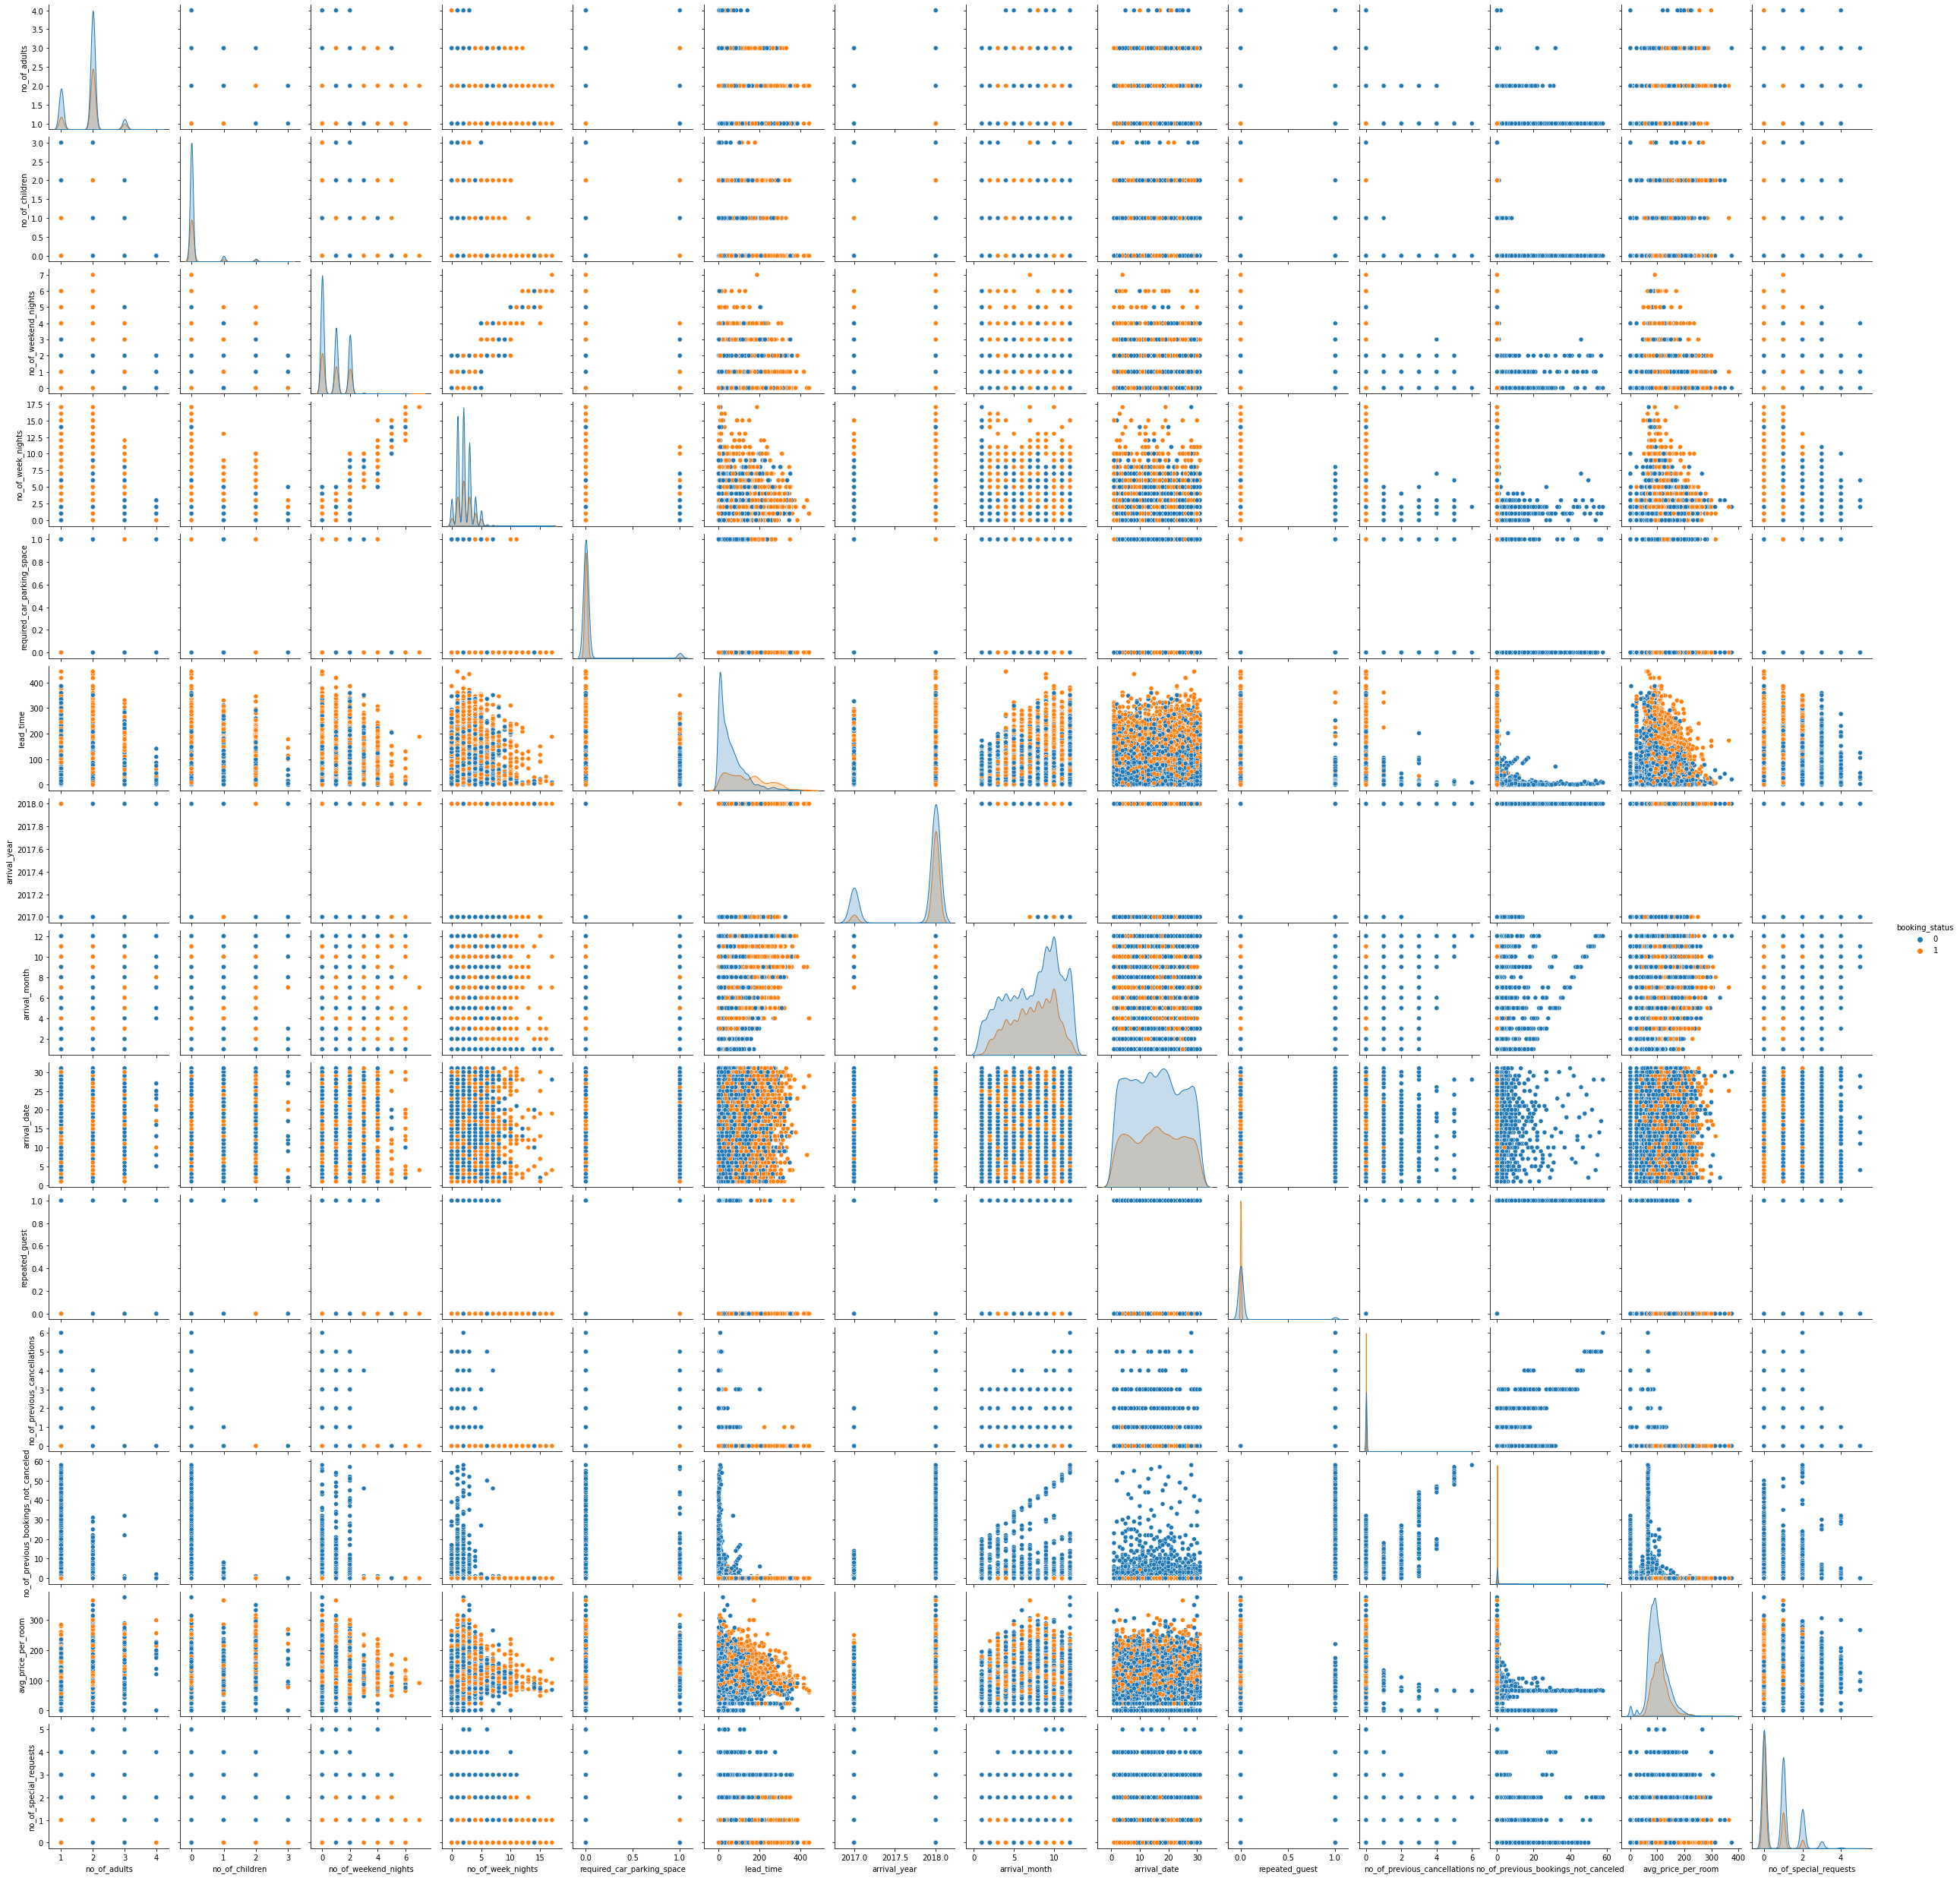

In [ ]:
sns.pairplot(df, hue="booking_status")
plt.show()

* There is strong linear positive relation between `no_of_weekend_nights` and `no_of_week_nights`.
* `lead_time` and `av_price_per_room` have a linear negative relation. Also, the shorter the lead time there are fewer cancelations.
* There also seems to be some relation with `arrival_month` and `no_of_previous_bookings_not_canceled`.
* `avg_price_per_room` and `no_of_week_nights` also have a negative relationship.
* `avg_price_per_room` and `no_of_weekend_nights` also have a negative relationship.
* There are overlaps (no clear distinction in the distribution of variables) for cancelled and non cancelled bookings.

## Building a Logistic Regression model

### Model evaluation criterion

1. Model predicted a non-canceled booking as a canceled - False Positive

2. Model predicted a canceled booking as a non-canceled - False Negative

A False Positive implies re-selling the room and having two arrivals and not being able to provide a room to one of them. That would result in a terrible service and reputation for the hotel.

A False Negatives implies that the hotel will not have the chance of re-selling the room/packages and will loosing those earnings.
 


Both are important hence I will focuse on F1.



In [ ]:
df.drop('arrival_year',axis= 1, inplace=True) # Dropping arrival year as it is irrelevant for any of the models 

In [ ]:
data['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [ ]:
data['booking_status'].value_counts(1)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

In [ ]:
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['booking_status'], axis=1)
Y = df['booking_status']

X = add_constant(X)

X = pd.get_dummies(X, drop_first=True)

X = pd.get_dummies(X, columns=['arrival_month','arrival_date'], drop_first= True)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y)

/Users/adri/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print("Shape of training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of training set :  (25295, 66)
Shape of test set :  (10841, 66)
Percentage of classes in training set:
0    0.672307
1    0.327693
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.672355
1    0.327645
Name: booking_status, dtype: float64


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36136 entries, 0 to 36274
Data columns (total 66 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   const                                 36136 non-null  float64
 1   no_of_adults                          36136 non-null  int64  
 2   no_of_children                        36136 non-null  int64  
 3   no_of_weekend_nights                  36136 non-null  int64  
 4   no_of_week_nights                     36136 non-null  int64  
 5   required_car_parking_space            36136 non-null  int64  
 6   lead_time                             36136 non-null  int64  
 7   repeated_guest                        36136 non-null  int64  
 8   no_of_previous_cancellations          36136 non-null  int64  
 9   no_of_previous_bookings_not_canceled  36136 non-null  int64  
 10  avg_price_per_room                    36136 non-null  float64
 11  no_of_special_r

In [ ]:
# Importing libraries to run the logistic model and performance measures
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

In [ ]:
logit = sm.Logit(y_train, x_train.astype(float))
lg = logit.fit()

         Current function value: 0.408011
         Iterations: 35


/Users/adri/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25295
Model:                          Logit   Df Residuals:                    25229
Method:                           MLE   Df Model:                           65
Date:                Sat, 10 Dec 2022   Pseudo R-squ.:                  0.3550
Time:                        00:25:13   Log-Likelihood:                -10321.
converged:                      False   LL-Null:                       -16000.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -5.1333      0.370    -13.882      0.000      -5.858      -4.409
no_of_adults                             0.1519      

In [ ]:
# Defining a confusion matrix for the logit model
def confusion_matrix_logitmodel(model, predictors, target, threshold=0.5):
    
    y_pred = model.predict(predictors) > threshold #Probabilities that are greater than the threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# Defining a data frame with the performance scores

def model_performance_classification_logitmodel(model, predictors, target, threshold=0.5):
    

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

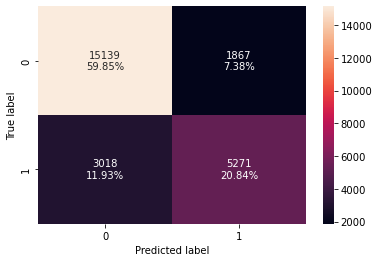

In [ ]:
confusion_matrix_logitmodel(lg, x_train, y_train)

In [ ]:
model_performance_classification_logitmodel(lg, x_train, y_train)

Accuracy    Recall  Precision        F1
0  0.806879  0.635903   0.738442  0.683347

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

* Before dropping variables that are not significant, I have to get rid of multicollinearity since my p_values are not reliable until I treat it. 

In [ ]:
# Defining a function that will show the complete Pandas Series
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [ ]:
# Getting VIF value to evaluate variables with multicollinearity.
vif_series = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
    dtype=float,)
print_full(vif_series)

const                                   367.180966
no_of_adults                              1.388217
no_of_children                            2.194896
no_of_weekend_nights                      1.086254
no_of_week_nights                         1.117873
required_car_parking_space                1.047380
lead_time                                 1.351735
repeated_guest                            1.723116
no_of_previous_cancellations              2.314052
no_of_previous_bookings_not_canceled      2.536391
avg_price_per_room                        2.439919
no_of_special_requests                    1.262457
type_of_meal_plan_Meal Plan 2             1.268473
type_of_meal_plan_Meal Plan 3             1.034425
type_of_meal_plan_Not Selected            1.249778
room_type_reserved_Room_Type 2            1.035837
room_type_reserved_Room_Type 3            1.007063
room_type_reserved_Room_Type 4            1.379948
room_type_reserved_Room_Type 5            1.036830
room_type_reserved_Room_Type 6 

* There is multicolineality with "Market_Segment_Type_Corporate/Offline/Online". 

* I will be dropping the highest VIF value which is "Market_Segment_Type_Online"

In [ ]:
x_train1 = x_train.drop(['market_segment_type_Online'], axis=1)

vif_series1 = pd.Series(
    [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])],
    index=x_train1.columns,
    dtype=float,
)
print_full(vif_series1)

const                                   98.757406
no_of_adults                             1.370867
no_of_children                           2.194831
no_of_weekend_nights                     1.086147
no_of_week_nights                        1.117083
required_car_parking_space               1.046999
lead_time                                1.347726
repeated_guest                           1.720402
no_of_previous_cancellations             2.314001
no_of_previous_bookings_not_canceled     2.536238
avg_price_per_room                       2.437502
no_of_special_requests                   1.257669
type_of_meal_plan_Meal Plan 2            1.268158
type_of_meal_plan_Meal Plan 3            1.034425
type_of_meal_plan_Not Selected           1.247951
room_type_reserved_Room_Type 2           1.035817
room_type_reserved_Room_Type 3           1.007061
room_type_reserved_Room_Type 4           1.374190
room_type_reserved_Room_Type 5           1.036813
room_type_reserved_Room_Type 6           2.156640


* There are still VIF values above 5. 
* I will eliminate "arrival_month_10" and observe how VIF values get affected.

In [ ]:
x_train1 = x_train1.drop(['arrival_month_10'], axis=1)

vif_series2 = pd.Series(
    [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])],
    index=x_train1.columns,
    dtype=float,
)
print_full(vif_series2)

const                                   76.459146
no_of_adults                             1.369665
no_of_children                           2.192858
no_of_weekend_nights                     1.086018
no_of_week_nights                        1.117041
required_car_parking_space               1.045314
lead_time                                1.315770
repeated_guest                           1.720327
no_of_previous_cancellations             2.312301
no_of_previous_bookings_not_canceled     2.535382
avg_price_per_room                       2.361079
no_of_special_requests                   1.254659
type_of_meal_plan_Meal Plan 2            1.266153
type_of_meal_plan_Meal Plan 3            1.034282
type_of_meal_plan_Not Selected           1.246747
room_type_reserved_Room_Type 2           1.034931
room_type_reserved_Room_Type 3           1.007036
room_type_reserved_Room_Type 4           1.374103
room_type_reserved_Room_Type 5           1.036774
room_type_reserved_Room_Type 6           2.154914


* By dropping "Market_Segment_Type_Online" and "arrival_month_10" I have treated multicollinearity and all VIF values are bellow 3.

In [ ]:
logit1 = sm.Logit(y_train, x_train1.astype(float))
lg1 = logit1.fit()

         Current function value: 0.409943
         Iterations: 35


/Users/adri/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
model_performance_classification_logitmodel(lg1, x_train1, y_train)

Accuracy    Recall  Precision        F1
0  0.807116  0.631198   0.741707  0.682005

* Dropping `Market_Segment_Type_Online` changed by little the performance metrics.
* It increased:  0.03% Accuracy and 0.44% Precision 
* It decreased: -0.74% Recall and -0.20% F1-score.

In [ ]:
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25295
Model:                          Logit   Df Residuals:                    25231
Method:                           MLE   Df Model:                           63
Date:                Sat, 10 Dec 2022   Pseudo R-squ.:                  0.3519
Time:                        00:25:34   Log-Likelihood:                -10370.
converged:                      False   LL-Null:                       -16000.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -3.6726      0.157    -23.353      0.000      -3.981      -3.364
no_of_adults                             0.1425      

* I have to clean the model from variables that are not significant now that my p_values are reliable.

* Significant p_values < 0.05 (5%).


In [ ]:
# initial list of columns
cols = x_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train1_aux = x_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train1_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

/Users/adri/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/adri/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/adri/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'repeated_guest', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'arrival_month_2', 'arrival_month_3', 'arrival_month_4', 'arrival_month_9', 'arrival_month_11', 'arrival_month_12', 'arrival_date_2', 'arrival_date_7', 'arrival_date_9', 'arrival_date_12', 'arrival_date_13', 'arrival_date_14', 'arrival_date_15', 'arrival_date_16', 'arrival_date_21', 'arrival_date_28', 'arrival_date_29']


In [ ]:
x_train2 = x_train1[selected_features]
x_test2 = x_test[selected_features]

In [ ]:
logit2 = sm.Logit(y_train, x_train2.astype(float))
lg2 = logit2.fit()

Optimization terminated successfully.
         Current function value: 0.410684
         Iterations 9


In [ ]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25295
Model:                          Logit   Df Residuals:                    25260
Method:                           MLE   Df Model:                           34
Date:                Sat, 10 Dec 2022   Pseudo R-squ.:                  0.3507
Time:                        00:25:41   Log-Likelihood:                -10388.
converged:                       True   LL-Null:                       -16000.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -3.8565      0.121    -31.896      0.000      -4.093      -3.619
no_of_adults                       0.1380      0.039      3.499      0.

Interpretation just by looking at the coefficient sign:

    - Positive coefficient increases the probability of canceling the current booking
    - Negative coefficients decrease the probability of canceling the current booking.

To be able to read the above summary, I need to get the coefficients odds and/or their percentage changes. 

In [ ]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=x_train2.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds          0.021142      1.147941        1.163095              1.156384   
Change_odd% -97.885762     14.794091       16.309539             15.638372   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                  1.057793                    0.191633   1.017455   
Change_odd%           5.779334                  -80.836701   1.745513   

             repeated_guest  avg_price_per_room  no_of_special_requests  \
Odds               0.154169            1.022756                0.219648   
Change_odd%      -84.583101            2.275555              -78.035213   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                               1.424608                        0.722570   
Change_odd%                       42.460764                      -27.743017   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                               0.755191                        0.482176   
Change_odd%                      -24.480870                      -51.782409   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                               0.315886                        0.215014   
Change_odd%                      -68.411412                      -78.498606   

             market_segment_type_Corporate  market_segment_type_Offline  \
Odds                              0.438981                     0.159003   
Change_odd%                     -56.101880                   -84.099729   

             arrival_month_2  arrival_month_3  arrival_month_4  \
Odds                2.502437         1.889331         1.415238   
Change_odd%       150.243654        88.933112        41.523754   

             arrival_month_9  arrival_month_11  arrival_month_12  \
Odds                0.808790          1.869926          0.261953   
Change_odd%       -19.120958         86.992635        -73.804651   

             arrival_date_2  arrival_date_7  arrival_date_9  arrival_date_12  \
Odds               0.633036        0.785885        0.737412         1.416210   
Change_odd%      -36.696436      -21.411543      -26.258818        41.620956   

             arrival_date_13  arrival_date_14  arrival_date_15  \
Odds                0.646335         0.729381         1.470746   
Change_odd%       -35.366515       -27.061930        47.074626   

             arrival_date_16  arrival_date_21  arrival_date_28  \
Odds                1.257156         0.720938         1.586679   
Change_odd%        25.715650       -27.906238        58.667939   

             arrival_date_29  
Odds                0.717081  
Change_odd%       -28.291906

Interpretation:

* `no_of_adults`: Holding all other features constant a 1 unit change in no_of_adults increases in 14.79% the odds of canceling the booking.
* `no_of_children`: Holding all other features constant 1 unit change in no_of_children increases in 16.31% the odds of canceling the booking.
* `no_of_weekend_nights`: Holding all other features constant 1 unit change in no_of_weekend_nights increases in 15.64% the odds of canceling the booking.
* `no_of_week_nights`: Holding all other features constant 1 unit change in no_of_week_nights increases in 5.78% the odds of canceling the booking.
* `required_car_parking_space`: Holding all other features constant, the odds of needing a parking space decrease by 80.84% the probability of canceling the booking.
* `lead_time`: Holding all other features constant, 1 unit change in lead_time increases in 1.75% the odds of canceling the booking.
* `repeated_guest`: Holding all other features constant, the odds of being a repeated guest decrease by 84.58% the probability of canceling the current booking than when it is not a repeated guest.
* `avg_price_per_room`: Holding all other features constant, 1 unit change in av_price_per_room increases in 2.28% the odds of canceling the booking.
* `no_of_special_requests`: Holding all other features constant, 1 unit change in no_of_special_requests decreases in 78.04% the odds of canceling the booking.
* `type_of_meal_plan_Not Select`: Holding all other features constant, the odds of booking a "type_of_meal_NotSelected" increase by 42.46% the probability of canceling the current booking.
* `room_type_reserved_Room_Type_2`: Holding all other features constant, the odds of booking a "room_type_reserved_Room_Type_2" decreases by 27.74% the probability of canceling the current booking.
* `room_type_reserved_Room_Type_4`: Holding all other features constant, the odds of booking a "room_type_reserved_Room_Type_4" decreases by 24.48% the probability of canceling the current booking.
* `room_type_reserved_Room_Type_5`: Holding all other features constant, the odds of booking a "room_type_reserved_Room_Type_5" decreases by 51.78% the probability of canceling the current booking.
* `room_type_reserved_Room_Type_6`: Holding all other features constant, the odds of booking a "room_type_reserved_Room_Type_6" decreases by 68.41% the probability of canceling the current booking.
* `room_type_reserved_Room_Type_7`: Holding all other features constant, the odds of booking a "room_type_reserved_Room_Type_7" decreases by 78.50% the probability of canceling the current booking.
* `market_segment_type_Corporate`: Holding all other features constant, the odds of booking through "market_segment_type_Corporate" decreases by 56.10% the probability of canceling the current booking.
* `market_segment_type_Offline`: Holding all other features constant, the odds of booking through "market_segment_type_Offline" decreases by 84.10% the probability of canceling the current booking.
* `arrival_month_2`: Holding all other features constant, if the booking arrival is in February, the probability of canceling the current booking increases by 150.24%.
* `arrival_month_3`: Holding all other features constant, if the booking arrival is in March, the probability of canceling the current booking increases by 88.93%.
* `arrival_month_12`: Holding all other features constant, if the booking arrival is in February, the probability of canceling the current booking decreases by 73.80%.

In [ ]:
log_reg_model_train_perf = model_performance_classification_logitmodel(lg2, x_train2, y_train)
log_reg_model_train_perf

Accuracy    Recall  Precision        F1
0  0.803993  0.632163    0.73297  0.678844

In [ ]:
log_reg_model_test_perf = model_performance_classification_logitmodel(lg2, x_test2, y_test)
log_reg_model_test_perf

Accuracy    Recall  Precision        F1
0   0.80214  0.632038   0.728187  0.676714

* For the test set, the model performance is lower, but not significantly lower than the train data, hence it is not an overfit model.
* Percentual changes in performance scores between train and test data were as followed: -0.23 Accuracy, -0.02% Recall, -0.65% Precision, and -0.31% F1-score.
* To have a better performance for F1-score, I have to explore which can the optimal threshold be.

## Model performance evaluation

### Defining a threshold method 1 : AUC-ROC Curve

* Training set

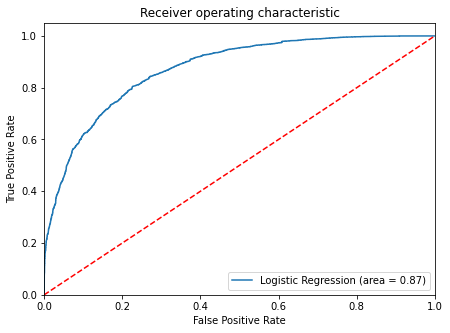

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(x_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(x_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(x_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print("The optimal threshold is:",optimal_threshold_auc_roc)

The optimal threshold is: 0.3070416333729603


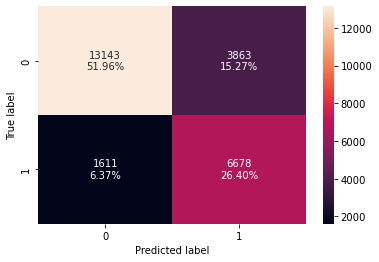

In [ ]:
confusion_matrix_logitmodel(
    lg2, x_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [ ]:
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_logitmodel(
    lg2, x_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0  0.783594  0.805646   0.633526  0.709294

* The Performance metric in the train set for F1-score increased by 4.49% in comparison with the train set threshold 0.5%.
* I have to see how this performs with the test set to see if there is any overfitting. 

Test set

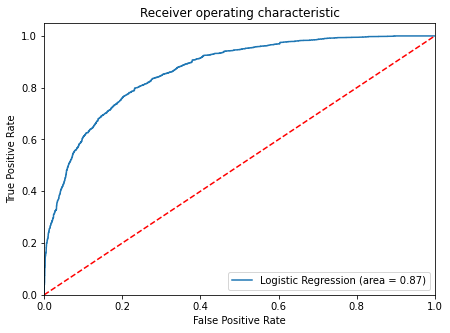

In [ ]:
logit_roc_auc_test = roc_auc_score(y_test, lg2.predict(x_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(x_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

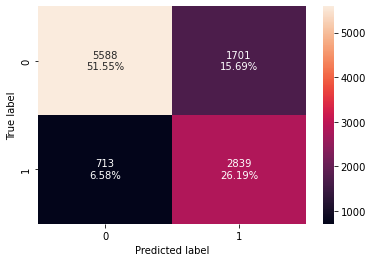

In [ ]:
confusion_matrix_logitmodel(lg2, x_test2, y_test, threshold=optimal_threshold_auc_roc)

In [ ]:
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_logitmodel(
    lg2, x_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy    Recall  Precision        F1
0  0.777327  0.799268    0.62533  0.701681

* All performing test metrics are doing lower than the test metrics, however, the decrease does not exceed  5%, hence the model is not overfitted.
* Decreased percentages were: -0.80% Accuracy, -0.79% Recall, -1.29% Precision and -1.07% F1-score.

### Defining a threshold method 2: Precision-Recall Curve

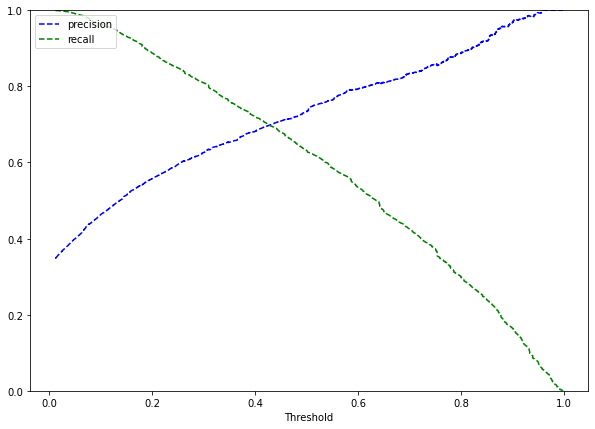

In [ ]:
y_scores = lg2.predict(x_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [ ]:
optimal_threshold_PRcurve = 0.42

* This method throws a higher threshold.

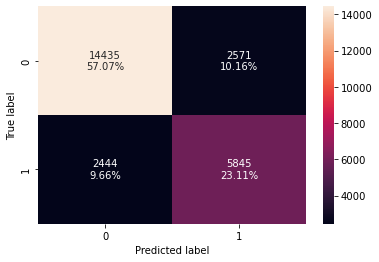

In [ ]:
confusion_matrix_logitmodel(lg2, x_train2, y_train, threshold=optimal_threshold_PRcurve)

In [ ]:
log_reg_model_train_perf_threshold_PRcurve = model_performance_classification_logitmodel(
    lg2, x_train2, y_train, threshold=optimal_threshold_PRcurve
)
print("Training performance:")
log_reg_model_train_perf_threshold_PRcurve

Training performance:


Accuracy    Recall  Precision       F1
0  0.801739  0.705151    0.69451  0.69979

* This method with a threshold of 0.41%  decreased the train F1-score by 1.34% in comparison to the train set threshold 0.31%.
* I need to check how this will perform in the test sample and see if there is any overfitting.

#### Test set

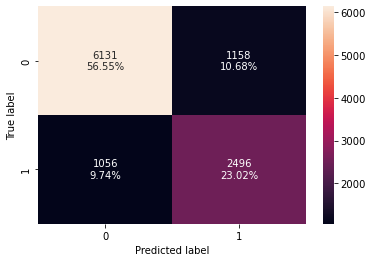

In [ ]:
confusion_matrix_logitmodel(lg2, x_test2, y_test, threshold=optimal_threshold_PRcurve)

In [ ]:
log_reg_model_test_perf_threshold_PRcurve = model_performance_classification_logitmodel(
    lg2, x_test2, y_test, threshold=optimal_threshold_PRcurve
)
print("Test performance:")
log_reg_model_test_perf_threshold_PRcurve

Test performance:


Accuracy    Recall  Precision        F1
0  0.795775  0.702703   0.683087  0.692756

* All performing test metrics are doing lower than the test metrics, however, the decrease does not exceed 5%, hence the model is not overfitted.
* Decreased percentages were: -0.74% Accuracy, -0.35% Recall, -1.64% Precision and -1.01% F1-score.

## Final Model Summary

In [ ]:
logit_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_PRcurve.T,
    ],
    axis=1,
)
logit_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.31 Threshold",
    "Logistic Regression-0.41 Threshold",
]

print("Training set logit performance comparison:")
logit_train_comp_df

Training set logit performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                      0.803993   
Recall                                        0.632163   
Precision                                     0.732970   
F1                                            0.678844   

           Logistic Regression-0.31 Threshold  \
Accuracy                             0.783594   
Recall                               0.805646   
Precision                            0.633526   
F1                                   0.709294   

           Logistic Regression-0.41 Threshold  
Accuracy                             0.801739  
Recall                               0.705151  
Precision                            0.694510  
F1                                   0.699790

In [ ]:
logit_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_PRcurve.T,
    ],
    axis=1,
)
logit_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.31 Threshold",
    "Logistic Regression-0.41 Threshold",
]

print("Test set logit performance comparison:")
logit_test_comp_df

Test set logit performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                      0.802140   
Recall                                        0.632038   
Precision                                     0.728187   
F1                                            0.676714   

           Logistic Regression-0.31 Threshold  \
Accuracy                             0.777327   
Recall                               0.799268   
Precision                            0.625330   
F1                                   0.701681   

           Logistic Regression-0.41 Threshold  
Accuracy                             0.795775  
Recall                               0.702703  
Precision                            0.683087  
F1                                   0.692756

* All three models are performing well on both training and test data without the problem of overfitting.
* The best threshold for a high F1-score in test data is 0.31, hence it can be selected as the final threshold.

## Building a Decision Tree model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

In [ ]:
df_tree = df.copy()

In [ ]:
df_tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36136 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36136 non-null  int64  
 1   no_of_children                        36136 non-null  int64  
 2   no_of_weekend_nights                  36136 non-null  int64  
 3   no_of_week_nights                     36136 non-null  int64  
 4   type_of_meal_plan                     36136 non-null  object 
 5   required_car_parking_space            36136 non-null  int64  
 6   room_type_reserved                    36136 non-null  object 
 7   lead_time                             36136 non-null  int64  
 8   arrival_month                         36136 non-null  int64  
 9   arrival_date                          36136 non-null  int64  
 10  market_segment_type                   36136 non-null  object 
 11  repeated_guest 

In [ ]:
x = df_tree.drop('booking_status' , axis=1)
y = df_tree.pop('booking_status')

In [ ]:
x = pd.get_dummies(df_tree, columns=['type_of_meal_plan','room_type_reserved','arrival_month','market_segment_type','arrival_date'], drop_first= True)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36136 entries, 0 to 36274
Data columns (total 65 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36136 non-null  int64  
 1   no_of_children                        36136 non-null  int64  
 2   no_of_weekend_nights                  36136 non-null  int64  
 3   no_of_week_nights                     36136 non-null  int64  
 4   required_car_parking_space            36136 non-null  int64  
 5   lead_time                             36136 non-null  int64  
 6   repeated_guest                        36136 non-null  int64  
 7   no_of_previous_cancellations          36136 non-null  int64  
 8   no_of_previous_bookings_not_canceled  36136 non-null  int64  
 9   avg_price_per_room                    36136 non-null  float64
 10  no_of_special_requests                36136 non-null  int64  
 11  type_of_meal_pl

In [ ]:
x.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   required_car_parking_space  lead_time  repeated_guest  \
0                           0        224               0   
1                           0          5               0   
2                           0          1               0   
3                           0        211               0   
4                           0         48               0   

   no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                             0                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             0                                     0   

   avg_price_per_room  no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
0               65.00                       0                              0   
1              106.68                       1                              0   
2               60.00                       0                              0   
3              100.00                       0                              0   
4               94.50                       0                              0   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                              0                               0   
1                              0                               1   
2                              0                               0   
3                              0                               0   
4                              0                               1   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   arrival_month_2  arrival_month_3  arrival_month_4  arrival_month_5  \
0                0                0                0                0   
1                0                0                0                0   
2                1                0                0                0   
3                0                0                0                1   
4                0                0                1                0   

   arrival_month_6  arrival_month_7  arrival_month_8  arrival_month_9  \
0                0                0                0                0   
1                0        

In [ ]:
y

0        0
1        0
2        1
3        1
4        1
        ..
36270    0
36271    1
36272    0
36273    1
36274    0
Name: booking_status, Length: 36136, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1)

In [ ]:
dTree = DecisionTreeClassifier(random_state=1)
model_tree = dTree.fit(x_train, y_train)

In [ ]:
# Function to get the performance scores
def model_performance_classification_tree(model, predictors, target):
  

    # predicting the model with the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
## Function to create confusion matrix for decision tree
def make_confusion_matrix_tree(model,y_actual,labels=[1, 0]):
    
    y_predict = model.predict(x_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

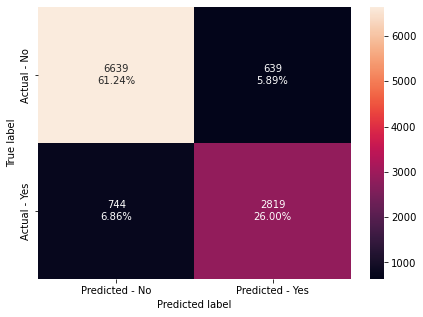

In [ ]:
make_confusion_matrix_tree(model_tree,y_test)

In [ ]:
default_tree_performance_train= model_performance_classification_tree(model_tree, x_train, y_train)
default_tree_performance_train

Accuracy    Recall  Precision        F1
0  0.994149  0.984417   0.997674  0.991001

In [ ]:
default_tree_performance_test= model_performance_classification_tree(model_tree, x_test, y_test)
default_tree_performance_test

Accuracy    Recall  Precision       F1
0  0.872429  0.791187   0.815211  0.80302

* Performance beetween trian set and test set shows overfitting of the model. Performance in train set is superior to test set in more than 5% for the percentual change.
* The percentual change was: -12.24% Accuracy, -19.63% Recall, -18.29% Precision and 18.97% F1 score.

In [ ]:
feature_names = list(x.columns)
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'arrival_month_2', 'arrival_month_3', 'arrival_month_4', 'arrival_month_5', 'arrival_month_6', 'arrival_month_7', 'arrival_month_8', 'arrival_month_9', 'arrival_month_10', 'arrival_month_11', 'arrival_month_12', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online', 'arrival_date_2', 'arrival_date_3', 'arrival_date_4', 'arrival_date_5', 'arrival_date_6', 'a

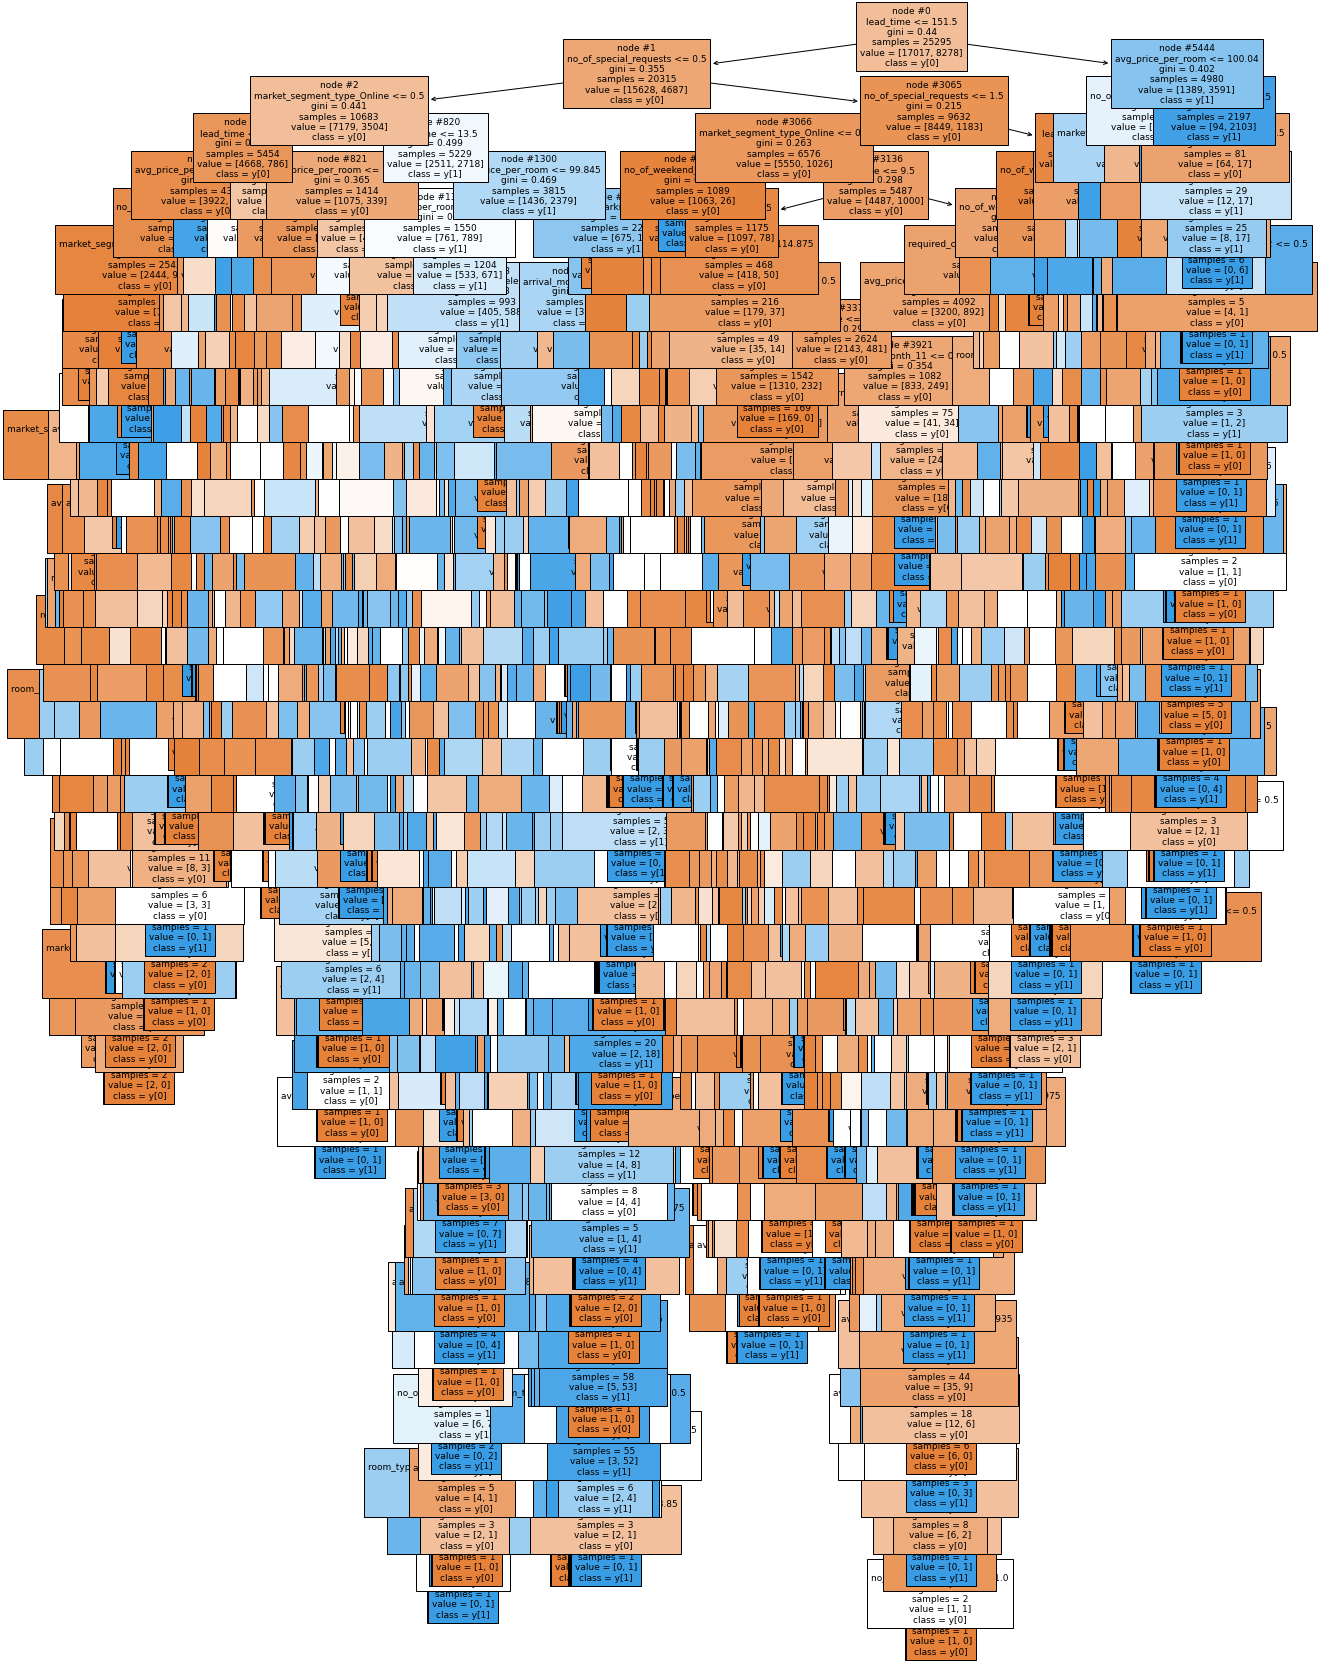

In [ ]:
# Visualizing the desicion tree with a plot.
plt.figure(figsize=(20,30))
tree.plot_tree(model_tree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

* The tree is humongous. 
* Leaves have sample sizes of 1. 
* This tree is overfitting and needs pruning. 

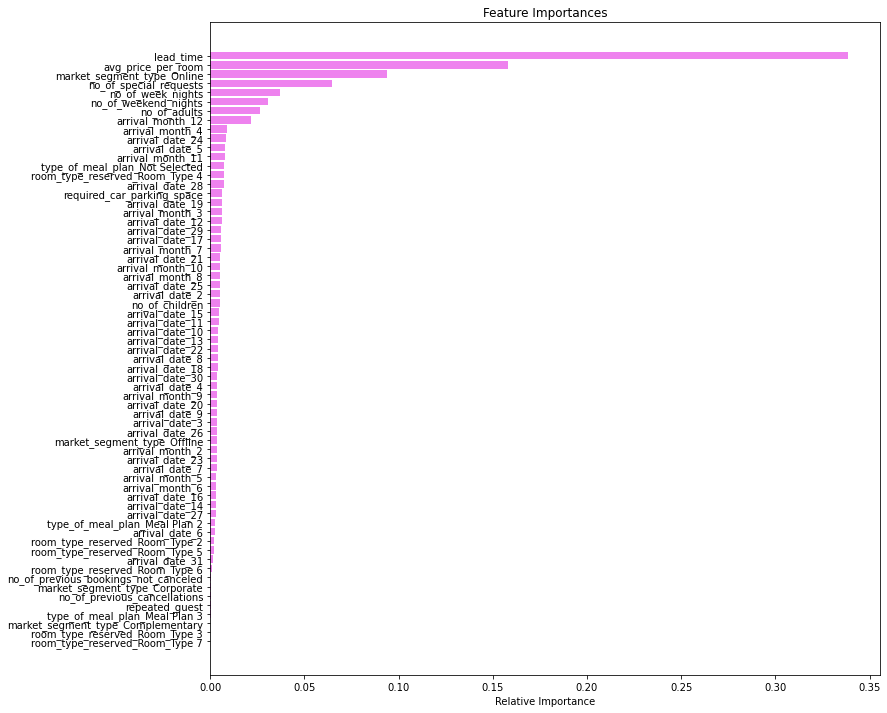

In [ ]:
# Let's see what are the features the tree prioritized for the segmentations.
importances = model_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Of 65 variables, the model considered 57 features to be important in the model.
* The 10 most important variables for this model: `lead_time`, `avg_price_per_room`, `market_segment_type_Online`, `no_special_requets`, `no_week_nights`, `no_weekend_nights`, `no_adults`, `arrival_month_12`, `arrival_month_4` and `arrival_date_24`.

## Do we need to prune the tree?

absolutely...

#### Pre pruning method: GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer

In [ ]:
# Checking the depht of the default tree
DecisionTreeClassifier.get_depth(model_tree)

43

In [ ]:
# Checking the number of leaves of the default tree
DecisionTreeClassifier.get_n_leaves(model_tree)

2959

In [ ]:
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose based on the maximum values of my default tree
parameters = {
    
    "max_depth": np.arange(2, 44, 2),
    "max_leaf_nodes": [1800, 2500, 2959],
    "min_samples_split": [30, 50, 70],
}

# Using F1 for the parameter comparison 
acc_scorer = make_scorer(f1_score)

# Run the grid search with 5 cross validations
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the new model estimator
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=14, max_leaf_nodes=1800, min_samples_split=30,
                       random_state=1)

* The best model estimated has a depth of 14, 1800 nodes and a minumum  of 30 observations per sample

In [ ]:
GridSearch_tree_performance_train = model_performance_classification_tree(estimator, x_train, y_train)
GridSearch_tree_performance_train

Accuracy    Recall  Precision        F1
0  0.896462  0.779415   0.890545  0.831283

In [ ]:
GridSearch_tree_performance_test = model_performance_classification_tree(estimator, x_test, y_test)
GridSearch_tree_performance_test

Accuracy    Recall  Precision        F1
0  0.874643  0.735897     0.8625  0.794184

* GridSeach method throws better results between train and test performance.
* Performance percentual changes between train and test sets: -2.43% Accuracy, -5.58% Recall, -3.15% Precision and -4.46% F1-socre.
* Percentual changes in parameters are bellow 5%, specially on the main parameter, F1-score, hence this model is not overfitting.

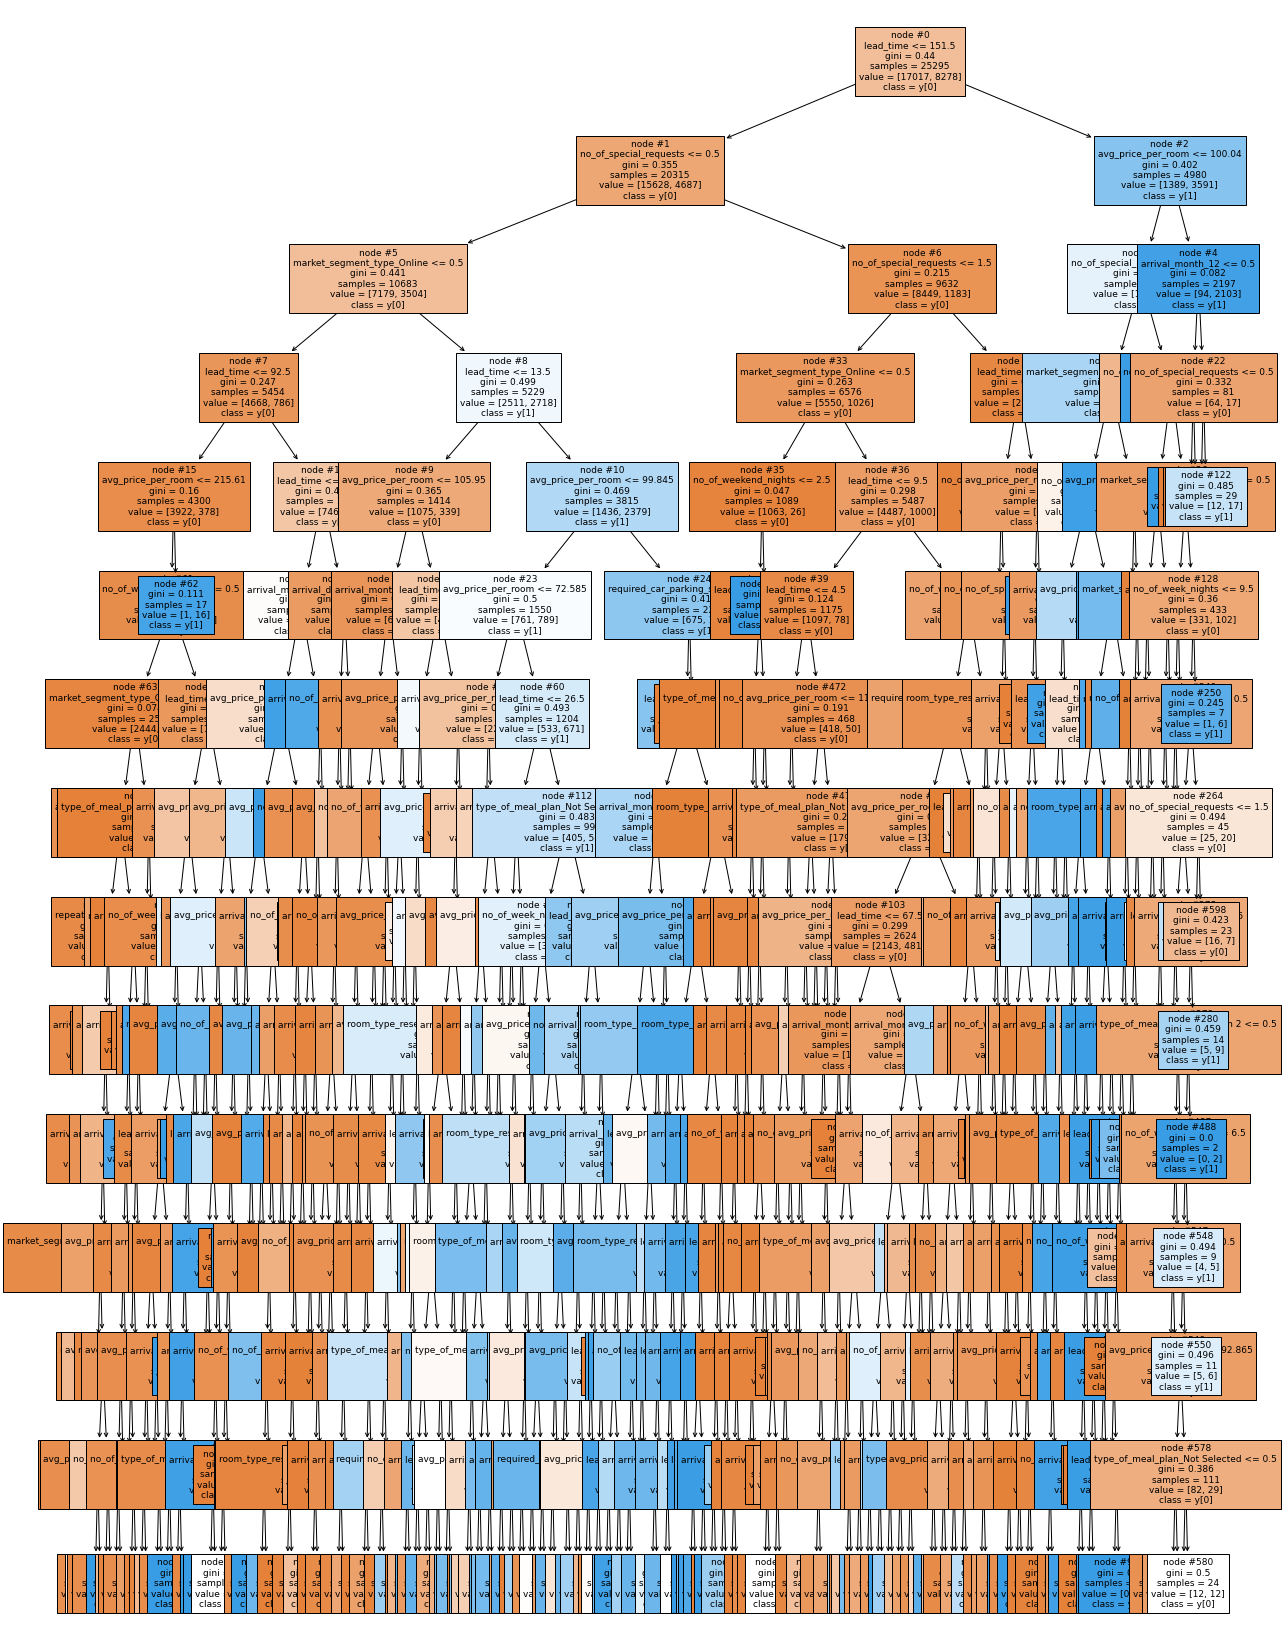

In [ ]:
# Visualizing the desicion tree with a plot.
plt.figure(figsize=(20,30))
tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

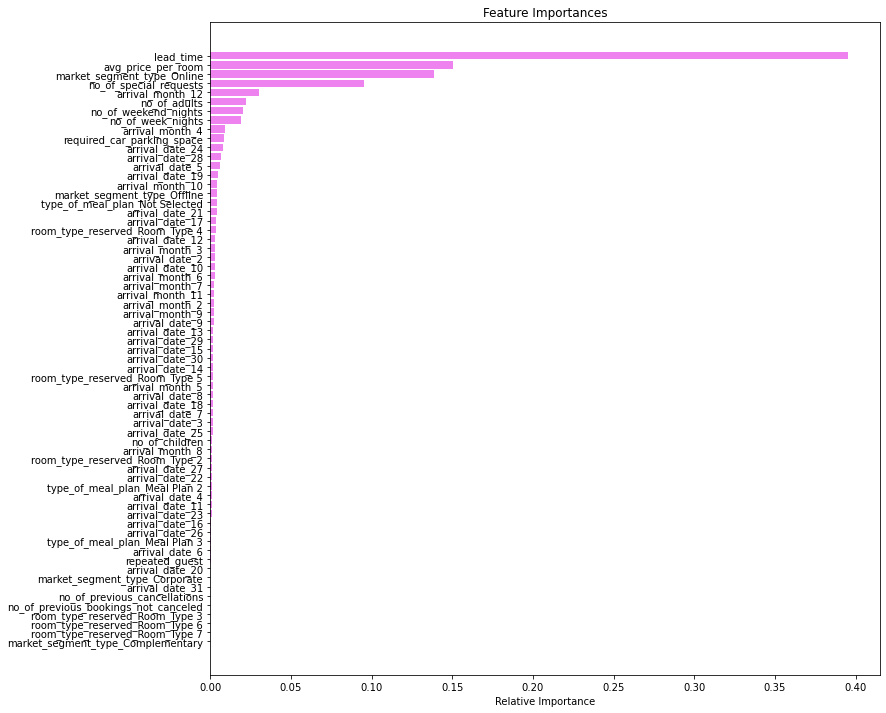

In [ ]:
# Lets see what are the features that the tree prioritized for the segmentations.
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Of 63 variables, the model considered 51 features to be important in the model.
* `lead_time`, `avg_price_per_room`, `market_segment_type_Online` and `no_special_requets` keep being the most important features.
* The 5th most important feature and so on did change to: `arrival_month_12`, `no_of_adults`, `no_weekend_nights`, `no_week_nights`, `arrival_month_4` and `required_car_parking_space`.

#### Post-pruning

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.007776
1     0.000000e+00    0.007776
2     2.710505e-20    0.007776
3     1.568790e-07    0.007776
4     2.662189e-07    0.007777
...            ...         ...
1334  6.837988e-03    0.288280
1335  1.201805e-02    0.300298
1336  1.733181e-02    0.317629
1337  2.332482e-02    0.364279
1338  7.604160e-02    0.440321

[1339 rows x 2 columns]

In [ ]:
print("The highest value of alpha is:",path['ccp_alphas'].max())

The highest value of alpha is: 0.07604160056052811


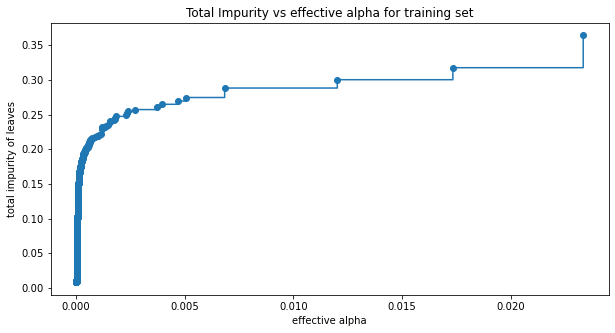

In [ ]:
# Plotting the total impurity of the leaves vs the alpha values for training set
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

* Marginal changes in the effective alpha have a big impact on the impurity of the leaves until the value of impurity reaches .20, after reaching .20 in impurity effective alphas start having bigger marginal changes.
* The highest alpha value is 0.076 with an impurity of 0.37 which corresponds to node 1. 

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07604160056052811


In [ ]:
# Removing the last element in clfs and ccp_alphas because it is the tree with only one node.
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

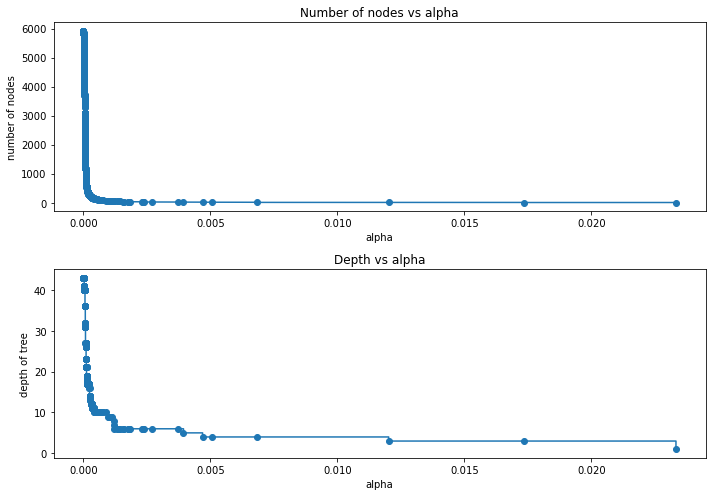

In [ ]:
# Plotting number of nodes/depht vs the value of alphas of training set
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

* For the number of nodes, these have a steep fall as alphas marginally increase.
* For depht, it also strongly falls as alphas marginally increase. It's until they reach depht 19 where there is a more significant value change in alpha values as alphas increases and tree depht decreases. 

In [ ]:
# Calculating F1-score for each model with each alpha train set pruning
f1_scores_train=[]
for clf in clfs:
    pred_train2=clf.predict(x_train)
    values_train= f1_score(y_train,pred_train2)
    f1_scores_train.append(values_train)

In [ ]:
# Calculating F1-score for each model with each alpha test set pruning
f1_scores_test=[]
for clf in clfs:
    pred_test2=clf.predict(x_test)
    values_test= f1_score(y_test,pred_test2)
    f1_scores_test.append(values_test)

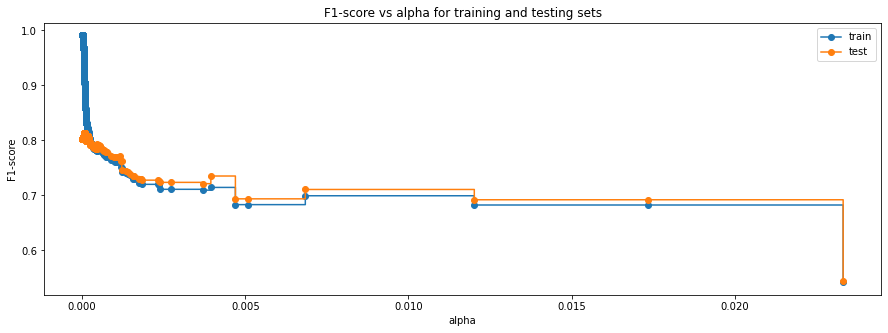

In [ ]:
# Plotting F1 score values from each model of train and test sets.
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1-score")
ax.set_title("F1-score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_scores_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, f1_scores_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

* Test F1-score is highest when alpha value is low.

In [ ]:
index_best_model = np.argmax(f1_scores_test)
costcomplex_model = clfs[index_best_model]
print(costcomplex_model)

DecisionTreeClassifier(ccp_alpha=7.490558774877503e-05, random_state=1)


* F1-score is highest when alpha value is 7.490558774877503e-05.

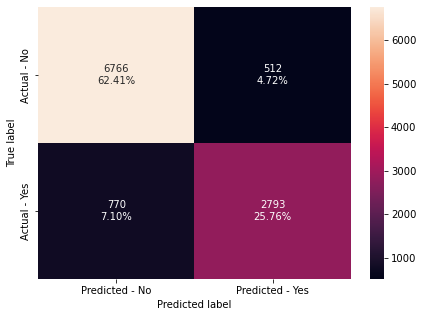

In [ ]:
make_confusion_matrix_tree(costcomplex_model,y_test)

In [ ]:
alphas_tree_perf_train = model_performance_classification_tree(costcomplex_model, x_train, y_train)
alphas_tree_perf_train

Accuracy    Recall  Precision        F1
0  0.932437  0.870017   0.919209  0.893937

In [ ]:
alphas_tree_perf_test = model_performance_classification_tree(costcomplex_model, x_test, y_test)
alphas_tree_perf_test

Accuracy   Recall  Precision        F1
0  0.881745  0.78389   0.845083  0.813337

* This model is overfitting, the percentual change between test and train sets for all scores is above -5%.
* Percentual changes: -5.44% Accuracy, 9.90% Recall, -8.06% Precision, -9.02% F1-score.

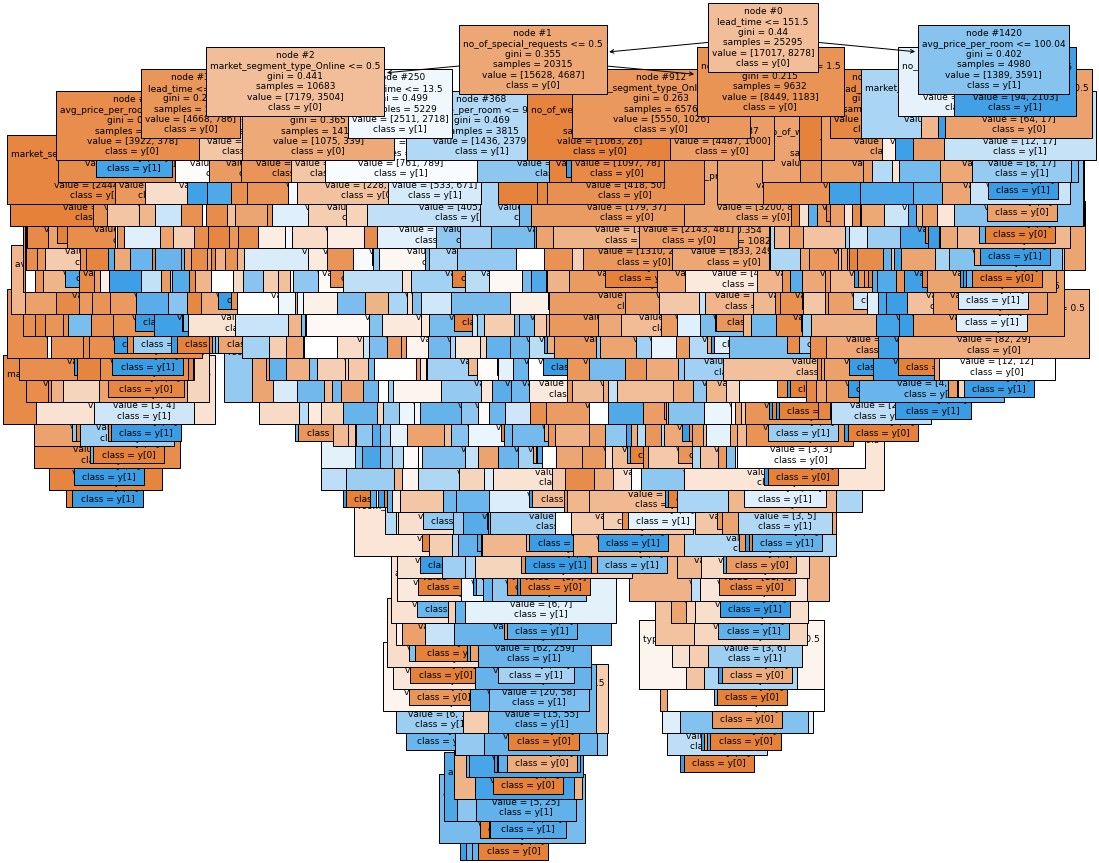

In [ ]:
# Plotting post-pruned tree
plt.figure(figsize=(17,15))

tree.plot_tree(costcomplex_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

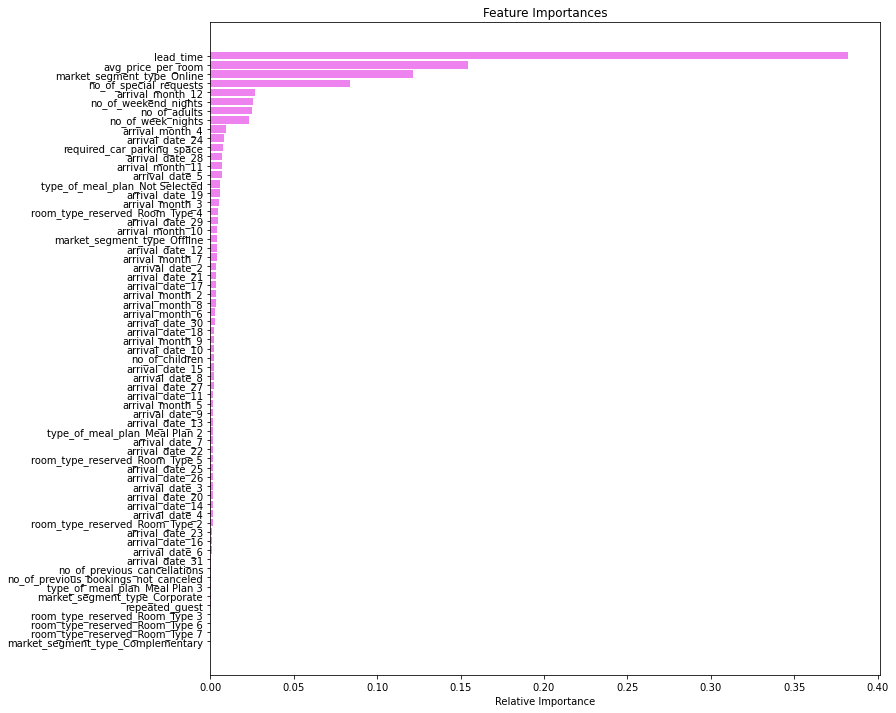

In [ ]:
# Plotting the feature importance for this tree
importances = costcomplex_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* `lead_time` and `av_price_per_room`, `market_segment_type_online`, and `no_special_request` keep the leading of feature importance.
* The order of importance of the 5th place and so on changed:  `arrival_month_12`, `no_weekend_nights`, `no_of_adults`, `no_week_nights`, `arrival_month_4`, and `arrival_date_24`.

## Model Performance Comparison and Conclusions

In [ ]:
tree_train_comp_df = pd.concat(
    [
        default_tree_performance_train.T,
        GridSearch_tree_performance_train.T,
        alphas_tree_perf_train.T,
    ],
    axis=1,
)
tree_train_comp_df.columns = [
    "Default tree",
    "Pre-pruning (GridSearch)",
    "Post-pruning",
]

print("Training set tree performance comparison:")
tree_train_comp_df

Training set tree performance comparison:


Default tree  Pre-pruning (GridSearch)  Post-pruning
Accuracy       0.994149                  0.896462      0.932437
Recall         0.984417                  0.779415      0.870017
Precision      0.997674                  0.890545      0.919209
F1             0.991001                  0.831283      0.893937

In [ ]:
tree_test_comp_df = pd.concat(
    [
        default_tree_performance_test.T,
        GridSearch_tree_performance_test.T,
        alphas_tree_perf_test.T,
    ],
    axis=1,
)
tree_test_comp_df.columns = [
    "Default tree",
    "Pre-pruning (GridSearch)",
    "Post-pruning",
]

print("Test set tree performance comparison:")
tree_test_comp_df

Test set tree performance comparison:


Default tree  Pre-pruning (GridSearch)  Post-pruning
Accuracy       0.872429                  0.874643      0.881745
Recall         0.791187                  0.735897      0.783890
Precision      0.815211                  0.862500      0.845083
F1             0.803020                  0.794184      0.813337

* We find the highest F1-score using the post-pruning (cost complexity) method. This method gives a 0.81 F-score, however, the model shows overfitting.
* The second highest F1-score is found in the default tree, but this tree is also overfitting.
* Pre-pruned tree for F1-score is just 2.35% lower in comparison to the post-pruning tree F1-score. 
* The best model is Pre-pruning (GridSearch method)with F1-score 0.79 because it doesn't show overfitting.

### LOGIT VS TREE COMPARISON (test-set)

In [ ]:
logit_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_PRcurve.T,
    ],
    axis=1,
)
logit_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.31 Threshold",
    "Logistic Regression-0.41 Threshold",
]

print("Test set logit performance comparison:")
logit_test_comp_df

Test set logit performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                      0.802140   
Recall                                        0.632038   
Precision                                     0.728187   
F1                                            0.676714   

           Logistic Regression-0.31 Threshold  \
Accuracy                             0.777327   
Recall                               0.799268   
Precision                            0.625330   
F1                                   0.701681   

           Logistic Regression-0.41 Threshold  
Accuracy                             0.795775  
Recall                               0.702703  
Precision                            0.683087  
F1                                   0.692756

In [ ]:
tree_test_comp_df = pd.concat(
    [
        default_tree_performance_test.T,
        GridSearch_tree_performance_test.T,
        alphas_tree_perf_test.T,
    ],
    axis=1,
)
tree_test_comp_df.columns = [
    "Default tree",
    "Pre-pruning (GridSearch)",
    "Post-pruning",
]

print("Test set tree performance comparison:")
tree_test_comp_df

Test set tree performance comparison:


Default tree  Pre-pruning (GridSearch)  Post-pruning
Accuracy       0.872429                  0.874643      0.881745
Recall         0.791187                  0.735897      0.783890
Precision      0.815211                  0.862500      0.845083
F1             0.803020                  0.794184      0.813337

* Best prediction model is the pre-pruned decision tree GridSearch method with an F1-score of 0.79 and no overfitting.
* Post-pruning is not the best model because it is an overfitted model, hence it is not considered.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

In [ ]:
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 92.50
|   |   |   |   |--- avg_price_per_room <= 215.61
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- avg_price_per_room <= 88.60
|   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |--- arrival_date_25 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- arrival_date_18 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- arrival_date_18 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [12.00, 5.00] class: 0
|   |   |   |   |   |   |   |   |   |--- arrival_date_25 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [3.00, 3.00] class: 0
|   |   |   |   |   |   |   |   |--- repeated_guest >  0.50

* The GridSearch model can be used to predict if a booking is going to be canceled or not and can correctly identify 76.6% of the bookings cancelations.
* `lead_time` and `av_price_per_room`, `market_segment_type_online`, and `no_special_request` are the top 4 most important variables in predicting whether a booking will be canceled or not.


* From the decision tree we can conclude that if:
1. lead_time is less than 92.50 days
2. the guest stays for 0 no_weekend_nights
3. it doesn't book Offline
4. the avg_price_per_room cost is greater than 88.6 euros
5. there is just 1 adult; and 
6. the arrival date is on the 18th, THEN the booking will be canceled. 



Business recommendations and policies:
* Grow repeated guest ratio through a "loyalty club card". Those guests do not tend to cancel their bookings.
* Sending email reminders about the booking 2 weeks, 1 week, and 2 days before the arrival date. This can also reduce the cancellation rate.
* For reservations made in July, June, and May, when most bookings are canceled, the break-even fee should be paid in advance. The rest of the payment can be done once arriving at the hotel. 
* For reservations made in August complete fee bookings should be paid in advance. August is one of the busiest months for the hotel (3rd month with the most arrivals), but also the second month with the most cancellations. By charging the complete fee, the hotel does not have to worry about re-selling the room.
* Cancellations made 2 weeks before the arrival date can have a complete refund. 
* Cancellations made 1 week before the arrival date can have a partial refund.
* Cancellations made 2 days before the arrival date should not have a refund. 


